# **GROUP 10:** Analyzing the comment sections of 4 different *youtube* videos about the 2017 and 2025 President Trump inauguration cerimony.

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [372]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import numpy as np
from bertopic import BERTopic
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('wordnet')
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\giulia macis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...


In [2]:
right_2016=pd.read_csv("youtube_comments_right_2016.csv")
right_2025=pd.read_csv("youtube_comments_right_2025.csv")
left_2016=pd.read_csv("youtube_comments_left_2016.csv")
left_2025=pd.read_csv("youtube_comments_left_2025.csv")

# Import CSV


In [4]:
left_2025

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@leeannalynn55,Love Trump! Best president of my lifetime!,2025-01-22T14:19:40Z,0,0
1,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@Theotherside111,Males and females 👏🏻👏🏻👏🏻👏🏻,2025-01-22T14:18:42Z,0,0
2,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@lindaed3594,"WOW, that is surely really significant: Martin...",2025-01-22T14:13:08Z,0,0
3,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@maribelcapano4600,"I love he speech, no paper or nothing. He just...",2025-01-22T14:13:05Z,0,0
4,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@BahzillaJr,"the entire ""elites"" people thought the democra...",2025-01-22T14:12:34Z,0,0
...,...,...,...,...,...,...,...,...
3789,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@MrMatt531,Good guys are back in office! What a great day!,2025-01-20T18:34:08Z,22,60
3790,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@donaldsydney5416,Trump ❤❤❤,2025-01-20T18:34:01Z,1,10
3791,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@EDUARDO-bj9wf,The world is against the deportation !,2025-01-20T18:33:59Z,0,0
3792,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@theweaselcat3564,Nope!,2025-01-20T18:33:41Z,0,2


In [5]:
left_2016

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@BB-ev4nk,God Bless America 🇺🇸 🙏🏻 🇺🇸🙏🏻🇺🇸🙏🏻🇺🇸🙏🏻,2025-01-22T07:44:28Z,0,0
1,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@marthacampetella8246,Fantastic,2025-01-21T21:50:04Z,0,0
2,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@MosesAhwejevu,Congratulations president trump for assumption...,2025-01-21T19:43:26Z,0,0
3,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@Edu-z1r,🙏,2025-01-21T13:29:28Z,0,0
4,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@svetlanakwaw-quaidoo314,I wish Trump also change American constitutio...,2025-01-21T11:37:09Z,0,0
...,...,...,...,...,...,...,...,...
5895,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@wassemasse,facepalm,2017-01-29T14:10:28Z,0,0
5896,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@wassemasse,what?????,2017-01-29T14:10:17Z,0,0
5897,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@wassemasse,what is he saying?,2017-01-29T14:09:44Z,0,0
5898,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@DieNeueOrdnung,He said every US american should get the credi...,2017-01-29T14:09:00Z,0,0


In [6]:
right_2025

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@StevenHoward1967,Thank God President Donald J Trump is Back in ...,2025-01-22T13:41:04Z,0,1
1,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@TerranceAnissaBarksdale,Oh my goodness this is sooooo true! I love it!,2025-01-22T12:47:44Z,0,0
2,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@jackiebrown2398,Another worst speech ever as always lack of in...,2025-01-22T11:56:44Z,0,0
3,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@jackiebrown2398,Trump hand was not on the Bible while he was t...,2025-01-22T11:50:23Z,0,0
4,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@normanross2668,trump announces a $500 Billion AI infrastructu...,2025-01-22T11:05:57Z,0,0
...,...,...,...,...,...,...,...,...
3426,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@donaldpump8882,GOLDEN AGE OF FELONIES😂😂😂😂😂😂😂😂,2025-01-20T17:48:14Z,6,1
3427,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@tinyginger,🎉,2025-01-20T17:48:04Z,0,3
3428,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@fytghggyungf7601,Beautiful coronation speech ❤,2025-01-20T17:47:55Z,11,34
3429,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@truepatriots3860,God Bless all True Patriots we will and must p...,2025-01-20T17:47:47Z,18,127


In [7]:
right_2016

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@4517onlyglory,Review this every month since the stolen 2020....,2024-12-06T07:14:20Z,0,0
1,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@Edward-r5h,This was one of the best moments in our countr...,2024-11-08T05:37:56Z,0,0
2,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@brianmarshall9937,Let's do it again!!!! MAGA 2024,2024-10-23T02:11:01Z,0,1
3,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@KINGDOMCUTSMINISTRIES,Military is in control 😮,2024-09-27T13:56:06Z,0,2
4,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@dursunturan3600,❤❤❤,2024-09-10T20:24:09Z,0,0
...,...,...,...,...,...,...,...,...
640,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@1966Hemi426,It's not often I shed a tear but I did today. ...,2017-01-20T17:38:47Z,47,538
641,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@oldschoolwrestling1808,OH HELL YEAH\nAmerica has just been blessed an...,2017-01-20T17:37:48Z,0,12
642,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@keitsi87,Trump is in way over his head. Poor guy.,2017-01-20T17:36:59Z,4,9
643,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@steeny1234,"WOW, TRUMP WAS POLITE BECAUSE WE ALL KNOW THAT...",2017-01-20T17:36:24Z,13,62


In [8]:
# Convert to datetime format
left_2016['publishedTimeText'] = pd.to_datetime(left_2016['publishedTimeText'], errors='coerce')
right_2016['publishedTimeText'] = pd.to_datetime(right_2016['publishedTimeText'], errors='coerce')

# Filter the DataFrame to keep only rows where the published date is before 2018
left_2016 = left_2016[left_2016['publishedTimeText'] < '2018-01-01']
right_2016 = right_2016[right_2016['publishedTimeText'] < '2018-01-01']

In [9]:
print("Checking for Null Values:\n")
print("right_2016",right_2016.isnull().sum())
print("right_2025",right_2025.isnull().sum())
print("left_2016",left_2016.isnull().sum())
print("right_2025",left_2025.isnull().sum())

Checking for Null Values:

right_2016 URL                  0
title                0
releaseDate          0
author               0
comment              0
publishedTimeText    0
replyCount           0
voteCount            0
dtype: int64
right_2025 URL                  0
title                0
releaseDate          0
author               3
comment              0
publishedTimeText    0
replyCount           0
voteCount            0
dtype: int64
left_2016 URL                  0
title                0
releaseDate          0
author               0
comment              0
publishedTimeText    0
replyCount           0
voteCount            0
dtype: int64
right_2025 URL                  0
title                0
releaseDate          0
author               1
comment              0
publishedTimeText    0
replyCount           0
voteCount            0
dtype: int64


In [10]:
#removing null values
right_2025_cleaned = right_2025.dropna()
left_2016_cleaned = left_2016.dropna()
left_2025_cleaned = left_2025.dropna()
right_2016_cleaned = right_2016.dropna()
print("Null values removed")

Null values removed


# PRE-PROCESSING AND WORD FREQUENCY OF THE COMMENTS

In [11]:
# FUNCTIONS CREATED
def process_text_column(dataset, column_name, remove_stop_words=True, exclude_irrelevant_pos=True, custom_stopwords=None):

    custom_stopwords = ["dont", "im", "u", "isnt",'i', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ours', 'ourselves',
            'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
            'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
            'theirs', 'themselves', 'this', 'that', 'these', 'those', 'is', 'am', 'are', 'was',
            'were', 'be', 'been', 'being', 'and', 'or', 'but', 'so', 'because', 'although','bla','j','da',
            'if', 'when', 'while',"video", "subscribe", "channel", "comment", "link", "HTTP","mar"]

    # Ensure required NLTK resources are available
    for resource in ['punkt', 'stopwords', 'averaged_perceptron_tagger', 'wordnet']:
        try:
            nltk.data.find(f'corpora/{resource}' if resource == 'stopwords' else f'tokenizers/{resource}')
        except LookupError:
            nltk.download(resource)

    # Load the lemmatizer
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Function to map POS tags for lemmatization
    def lookup_pos(pos):
        if pos.startswith('J'):
            return 'a'  # Adjective
        elif pos.startswith('V'):
            return 'v'  # Verb
        elif pos.startswith('N'):
            return 'n'  # Noun
        elif pos.startswith('R'):
            return 'r'  # Adverb
        else:
            return 'n'  # Default to noun

    # Load stopwords and include custom stopwords
    stop_words = set()
    if remove_stop_words:
        stop_words = set(nltk.corpus.stopwords.words('english'))
    if custom_stopwords:
        stop_words.update(custom_stopwords)

    # Combine stopwords with punctuation
    all_removal_tokens = stop_words | set(string.punctuation)

    # Define relevant POS tags
    relevant_pos_tags = {
        'NN', 'NNS', 'NNP', 'NNPS',  # Nouns
        'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  # Verbs
        'JJ', 'JJR', 'JJS',  # Adjectives
        'RB', 'RBR', 'RBS'   # Adverbs
    }

    def process_single_text(text):
        # Remove unwanted characters (keep only words and spaces)
        text = re.sub(r"[^\w\s]", "", str(text))

        # Tokenize sentences and words, and get POS tags
        sentences = nltk.sent_tokenize(text)
        words_and_pos_tags = [
            (word, pos)
            for sentence in sentences
            for word, pos in nltk.pos_tag(nltk.word_tokenize(sentence))
        ]

        # Lemmatize words and filter by POS
        lemmas = [
            lemmatizer.lemmatize(word.lower(), lookup_pos(pos))
            for word, pos in words_and_pos_tags
            if word.lower() not in all_removal_tokens and
            (not exclude_irrelevant_pos or pos in relevant_pos_tags)
        ]

        return ' '.join(lemmas)

    # Process each row in the dataset and join all text into a single string
    dataset['processed_comment'] = dataset[column_name].apply(process_single_text)

    return dataset



def freq_distribution(data, column, top_n=15, plot_title="Top Word Frequencies"):


    all_text = ' '.join(data[column].dropna()) # Concatenate all text in the specified column, dropping NaN values


    sentence_words = nltk.word_tokenize(all_text) # Tokenize the concatenated text into individual words


    frequencies = nltk.probability.FreqDist(sentence_words)  # Get word frequencies

    # Plot the frequencies
    frequencies.plot(top_n, cumulative=False, title=plot_title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

    return frequencies

#removing words that  appear in more than 50% of the comments
#removing words that appear in less than 3 comments
def filter_comments_by_frequency(data, column, low_cutoff, high_percentage_cutoff):
    # Number of comments
    num_comments = len(data)

    # Calculate document frequency for each word
    word_document_counts = {}
    for comment in data[column]:
        # Tokenize and normalize (lowercase)
        unique_words = set(word for word in nltk.word_tokenize(comment))
        for word in unique_words:
            word_document_counts[word] = word_document_counts.get(word, 0) + 1

    # Identify frequent and rare words based on document frequency
    frequent_words = {word for word, count in word_document_counts.items() if count / num_comments > high_percentage_cutoff}
    rare_words = {word for word, count in word_document_counts.items() if count <= low_cutoff}

    # Combine frequent and rare words to exclude
    exclude_words = frequent_words | rare_words

    # Filter the comments
    data['filtered_comment'] = data[column].apply(
        lambda text: ' '.join([word for word in nltk.word_tokenize(text) if word not in exclude_words])
    )

    return data.head()



def plot_top_bigrams(data, column, top_n=15, plot_title="Top Bigrams in Text Data"):

    all_text = ' '.join(data[column].dropna())


    sentence_words = nltk.word_tokenize(all_text)

    bigrams = list(nltk.bigrams(sentence_words)) # Generate bigrams


    bigram_freq = Counter(bigrams)  # Calculate the frequency of bigrams


    most_common_bigrams = bigram_freq.most_common(top_n)


    bigram_labels, bigram_counts = zip(*most_common_bigrams)
    bigram_labels = [' '.join(pair) for pair in bigram_labels]  # Convert tuples to strings

    # Plot the bigrams
    plt.figure(figsize=(10, 6))
    plt.barh(bigram_labels, bigram_counts)
    plt.xlabel("Frequency")
    plt.ylabel("Bigrams")
    plt.title(plot_title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

    return most_common_bigrams




def plot_top_trigrams(data, column, top_n=15, plot_title="Top Trigrams in Text Data"):


    all_text = ' '.join(data[column].dropna())


    sentence_words = nltk.word_tokenize(all_text)


    trigrams = list(nltk.trigrams(sentence_words))  # Generate trigrams


    trigram_freq = Counter(trigrams) # Calculate the frequency of trigrams

    most_common_trigrams = trigram_freq.most_common(top_n)


    trigram_labels, trigram_counts = zip(*most_common_trigrams)
    trigram_labels = [' '.join(trio) for trio in trigram_labels]  # Convert tuples to strings

    # Plot the trigrams
    plt.figure(figsize=(10, 6))
    plt.barh(trigram_labels, trigram_counts)
    plt.xlabel("Frequency")
    plt.ylabel("Trigrams")
    plt.title(plot_title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

    return most_common_trigrams




analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [12]:
process_text_column(left_2025_cleaned, 'comment', remove_stop_words=True, exclude_irrelevant_pos=True, custom_stopwords=None)
process_text_column(left_2016_cleaned, 'comment', remove_stop_words=True, exclude_irrelevant_pos=True, custom_stopwords=None)
process_text_column(right_2025_cleaned, 'comment', remove_stop_words=True, exclude_irrelevant_pos=True, custom_stopwords=None)
process_text_column(right_2016_cleaned, 'comment', remove_stop_words=True, exclude_irrelevant_pos=True, custom_stopwords=None)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\giulia macis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\giulia macis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\giulia macis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Do

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount,processed_comment
135,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@waynewedderburn342,Psalm 24;34;67;1-150 God protection,2017-12-31 01:25:20+00:00,0,0,psalm god protection
136,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@tommyblanchard7711,Yes yes yes yes yes yes. And more,2017-12-24 01:53:03+00:00,0,0,yes
137,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@midomisry62,Trump clean your cabinet and clean yourself b...,2017-12-09 02:30:11+00:00,0,0,trump clean cabinet clean mass like clean your...
138,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@shaheedkhan9012,I think President trump will do well and all t...,2017-11-24 17:13:20+00:00,0,0,think president trump well best
139,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@faresmeziou6243,That s so weird,2017-11-05 17:12:20+00:00,0,0,weird
...,...,...,...,...,...,...,...,...,...
640,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@1966Hemi426,It's not often I shed a tear but I did today. ...,2017-01-20 17:38:47+00:00,47,538,often shed tear today truly hope america futur...
641,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@oldschoolwrestling1808,OH HELL YEAH\nAmerica has just been blessed an...,2017-01-20 17:37:48+00:00,0,12,oh hell yeah america bless ready kick as rock
642,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@keitsi87,Trump is in way over his head. Poor guy.,2017-01-20 17:36:59+00:00,4,9,trump way head poor guy
643,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@steeny1234,"WOW, TRUMP WAS POLITE BECAUSE WE ALL KNOW THAT...",2017-01-20 17:36:24+00:00,13,62,wow trump polite know barry fraud trying hard ...


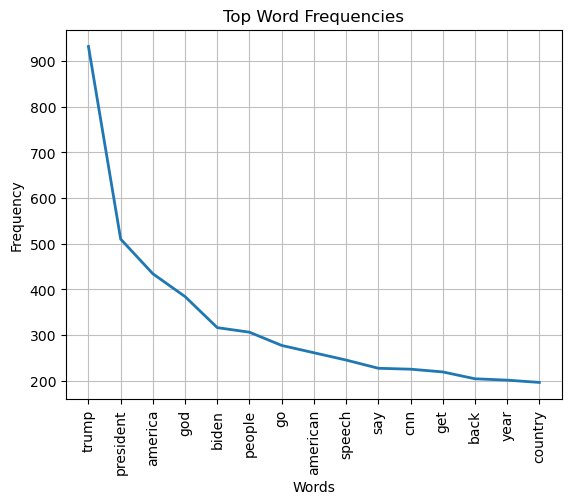

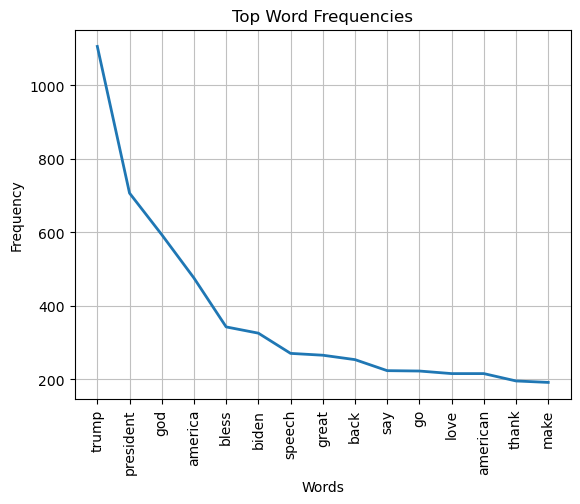

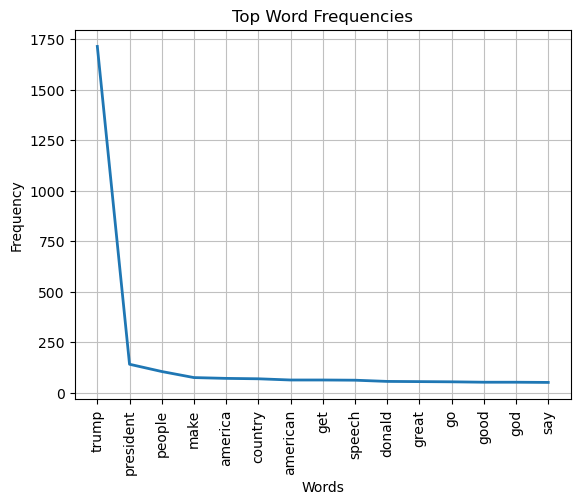

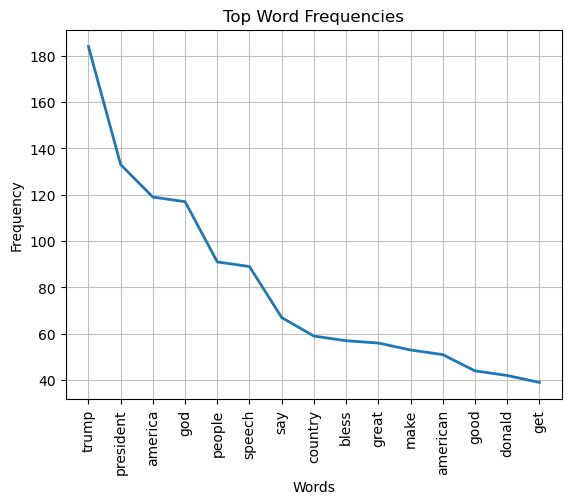

FreqDist({'trump': 184, 'president': 133, 'america': 119, 'god': 117, 'people': 91, 'speech': 89, 'say': 67, 'country': 59, 'bless': 57, 'great': 56, ...})

In [13]:
freq_distribution(left_2025_cleaned, 'processed_comment', top_n=15, plot_title="Top Word Frequencies")
freq_distribution(right_2025_cleaned, 'processed_comment', top_n=15, plot_title="Top Word Frequencies")
freq_distribution(left_2016_cleaned, 'processed_comment', top_n=15, plot_title="Top Word Frequencies")
freq_distribution(right_2016_cleaned, 'processed_comment', top_n=15, plot_title="Top Word Frequencies")

In [14]:
filter_comments_by_frequency(left_2025_cleaned, 'processed_comment', 3, high_percentage_cutoff=0.5)
filter_comments_by_frequency(left_2016_cleaned, 'processed_comment', 3, high_percentage_cutoff=0.5)
filter_comments_by_frequency(right_2025_cleaned, 'processed_comment', 3, high_percentage_cutoff=0.5)
filter_comments_by_frequency(right_2016_cleaned,'processed_comment', 3, high_percentage_cutoff=0.5)

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount,processed_comment,filtered_comment
135,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@waynewedderburn342,Psalm 24;34;67;1-150 God protection,2017-12-31 01:25:20+00:00,0,0,psalm god protection,god
136,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@tommyblanchard7711,Yes yes yes yes yes yes. And more,2017-12-24 01:53:03+00:00,0,0,yes,
137,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@midomisry62,Trump clean your cabinet and clean yourself b...,2017-12-09 02:30:11+00:00,0,0,trump clean cabinet clean mass like clean your...,trump clean cabinet clean like clean man go ti...
138,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@shaheedkhan9012,I think President trump will do well and all t...,2017-11-24 17:13:20+00:00,0,0,think president trump well best,think president trump well best
139,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@faresmeziou6243,That s so weird,2017-11-05 17:12:20+00:00,0,0,weird,


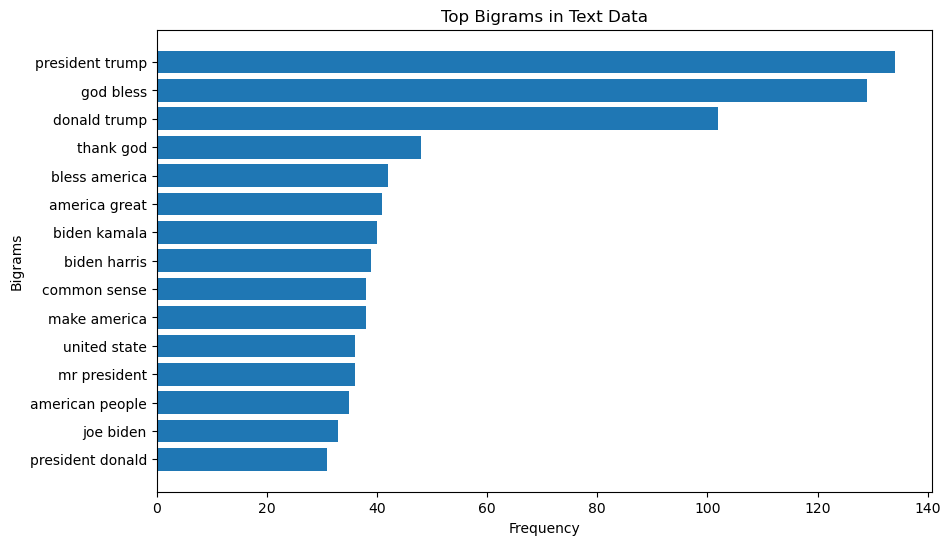

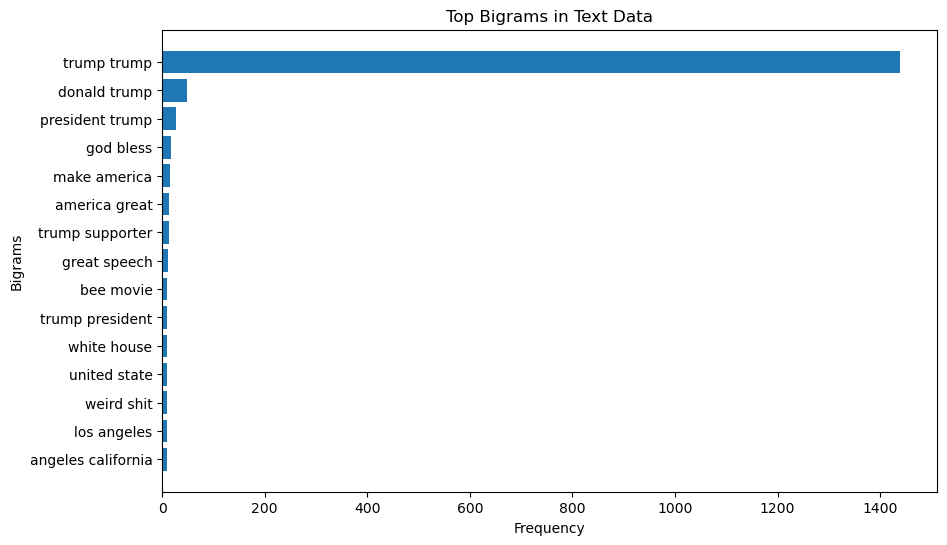

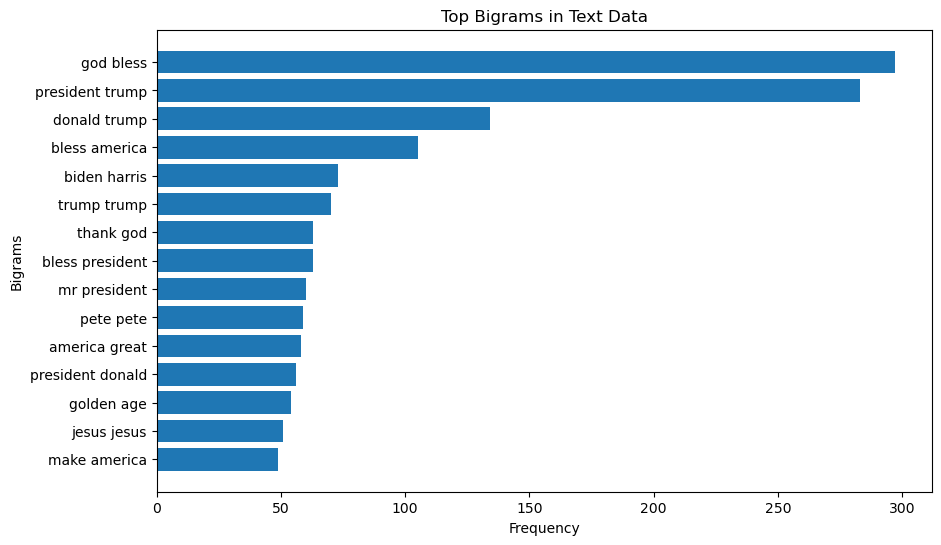

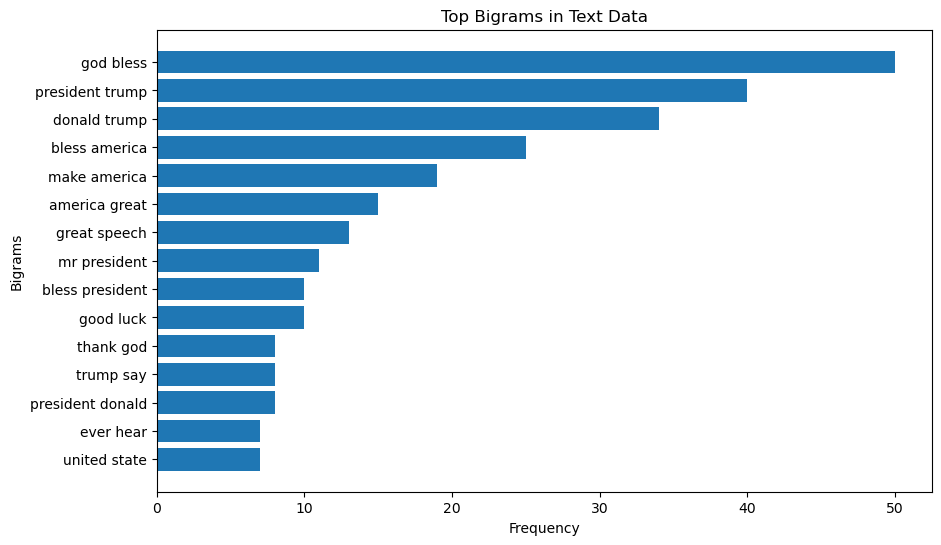

[(('god', 'bless'), 50),
 (('president', 'trump'), 40),
 (('donald', 'trump'), 34),
 (('bless', 'america'), 25),
 (('make', 'america'), 19),
 (('america', 'great'), 15),
 (('great', 'speech'), 13),
 (('mr', 'president'), 11),
 (('bless', 'president'), 10),
 (('good', 'luck'), 10),
 (('thank', 'god'), 8),
 (('trump', 'say'), 8),
 (('president', 'donald'), 8),
 (('ever', 'hear'), 7),
 (('united', 'state'), 7)]

In [15]:
## Bigrams
plot_top_bigrams(left_2025_cleaned, 'processed_comment', top_n=15, plot_title="Top Bigrams in Text Data")
plot_top_bigrams(left_2016_cleaned, 'processed_comment', top_n=15, plot_title="Top Bigrams in Text Data")
plot_top_bigrams(right_2025_cleaned, 'processed_comment', top_n=15, plot_title="Top Bigrams in Text Data")
plot_top_bigrams(right_2016_cleaned, 'processed_comment', top_n=15, plot_title="Top Bigrams in Text Data")

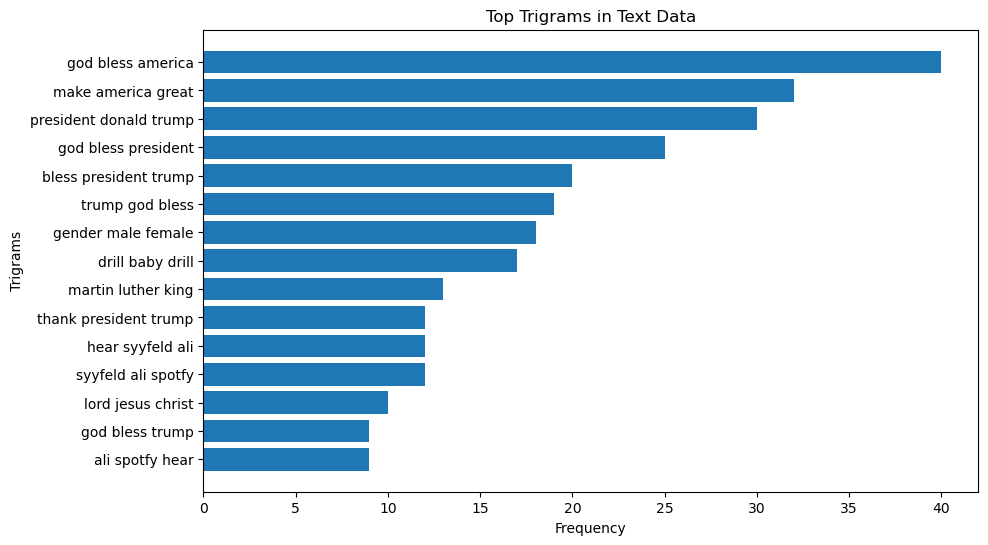

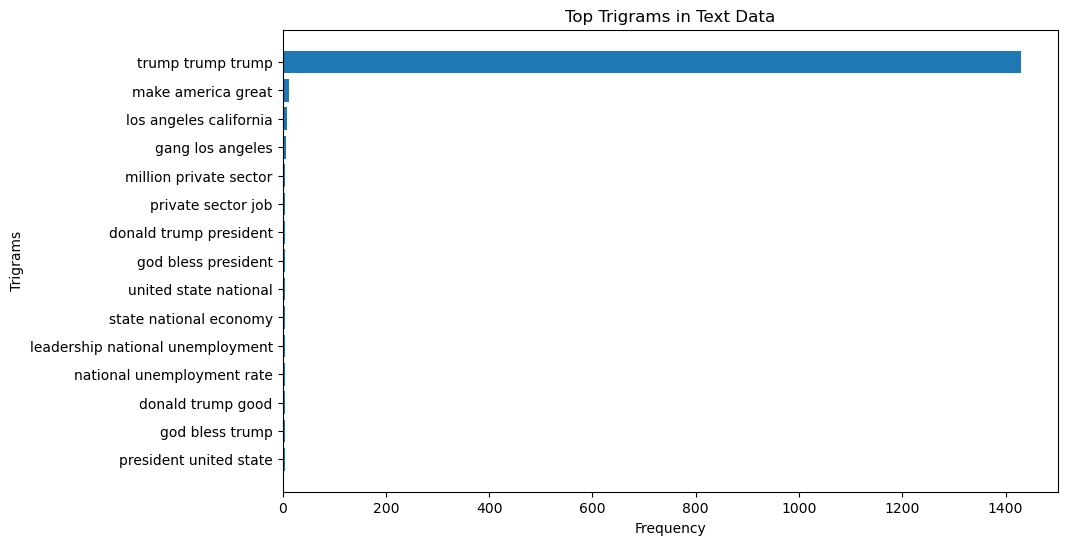

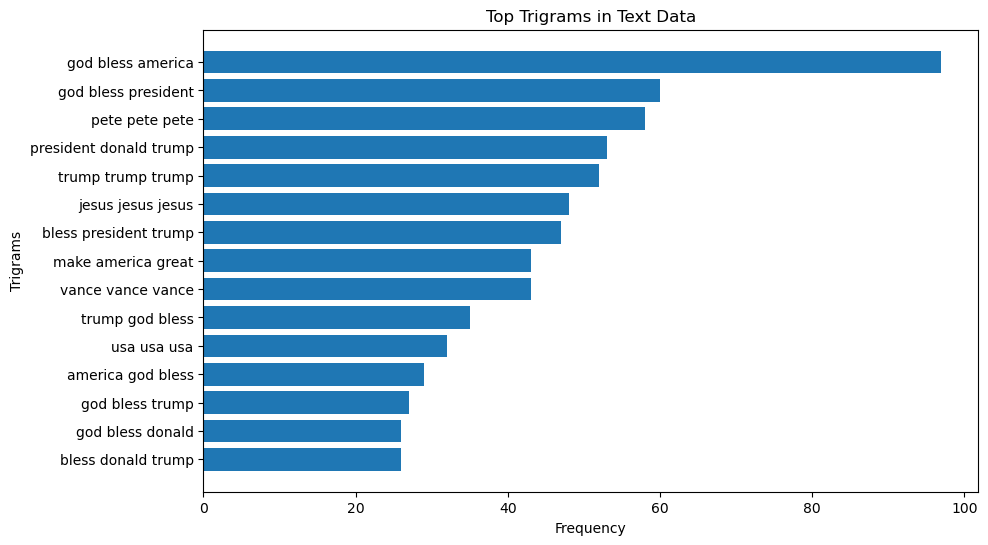

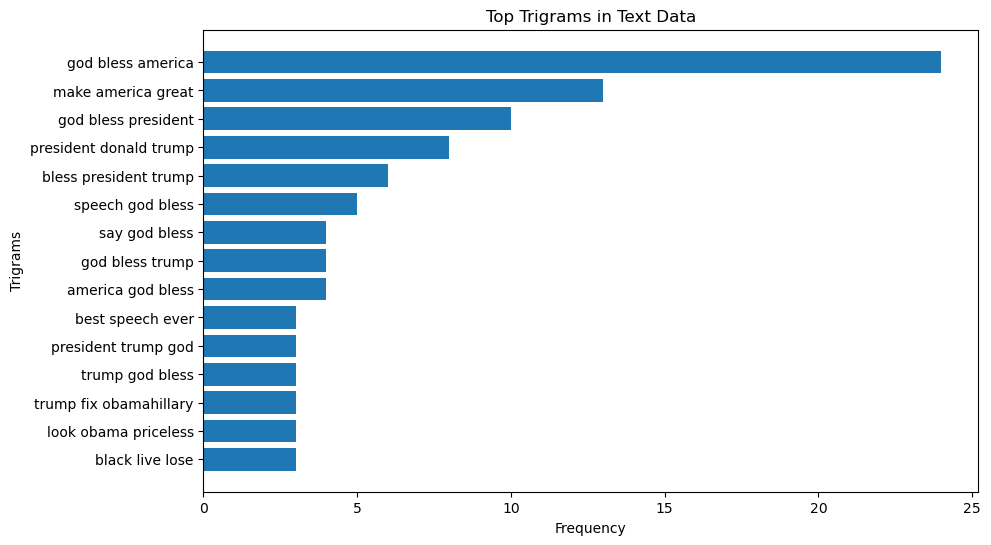

[(('god', 'bless', 'america'), 24),
 (('make', 'america', 'great'), 13),
 (('god', 'bless', 'president'), 10),
 (('president', 'donald', 'trump'), 8),
 (('bless', 'president', 'trump'), 6),
 (('speech', 'god', 'bless'), 5),
 (('say', 'god', 'bless'), 4),
 (('god', 'bless', 'trump'), 4),
 (('america', 'god', 'bless'), 4),
 (('best', 'speech', 'ever'), 3),
 (('president', 'trump', 'god'), 3),
 (('trump', 'god', 'bless'), 3),
 (('trump', 'fix', 'obamahillary'), 3),
 (('look', 'obama', 'priceless'), 3),
 (('black', 'live', 'lose'), 3)]

In [16]:
## trigrams
plot_top_trigrams(left_2025_cleaned, 'processed_comment', top_n=15, plot_title="Top Trigrams in Text Data")
plot_top_trigrams(left_2016_cleaned, 'processed_comment', top_n=15, plot_title="Top Trigrams in Text Data")
plot_top_trigrams(right_2025_cleaned, 'processed_comment', top_n=15, plot_title="Top Trigrams in Text Data")
plot_top_trigrams(right_2016_cleaned, 'processed_comment', top_n=15, plot_title="Top Trigrams in Text Data")

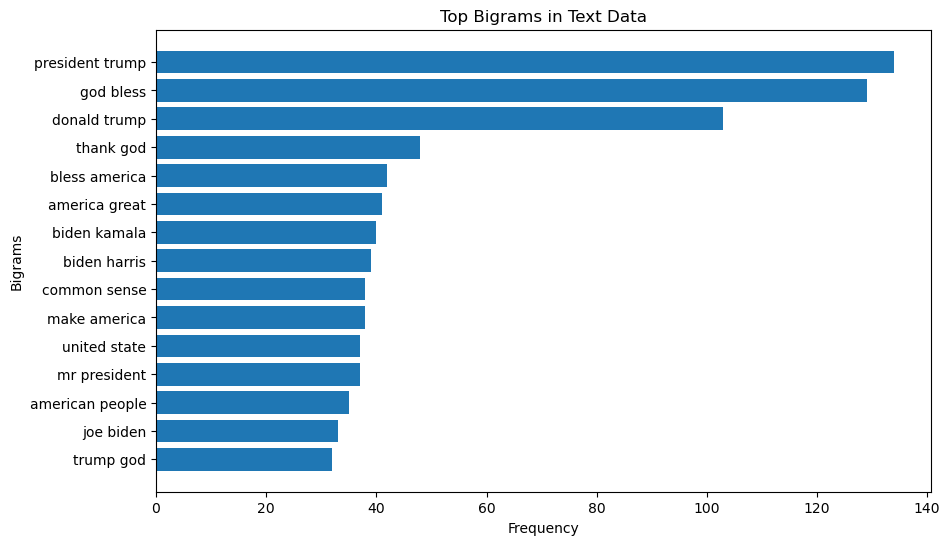

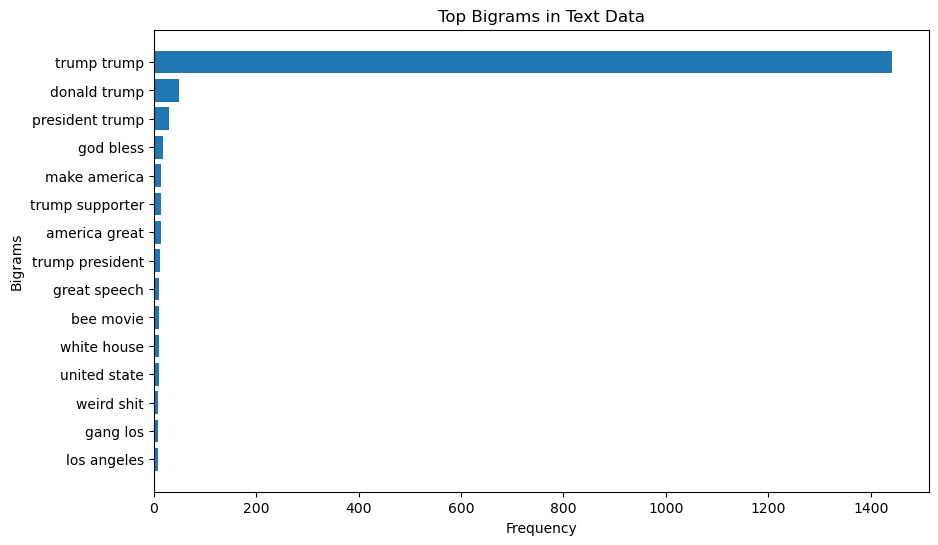

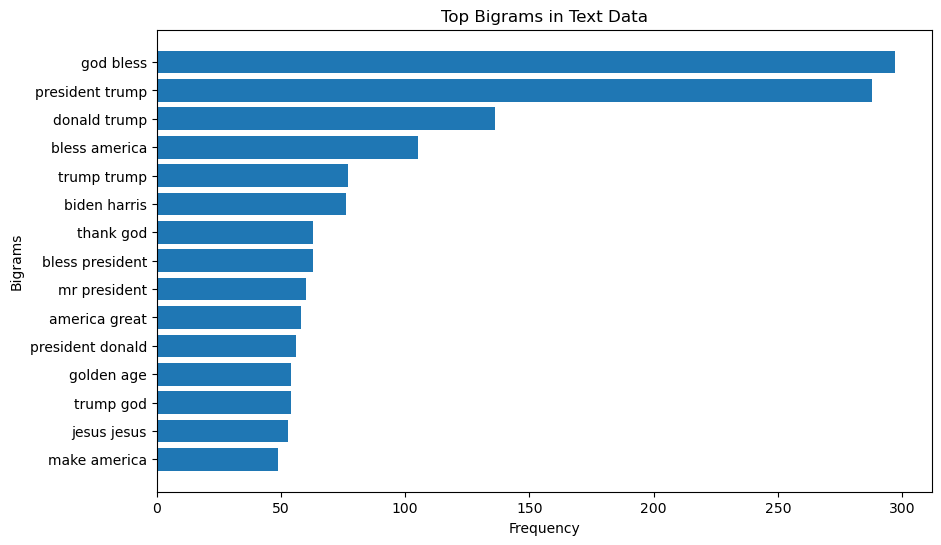

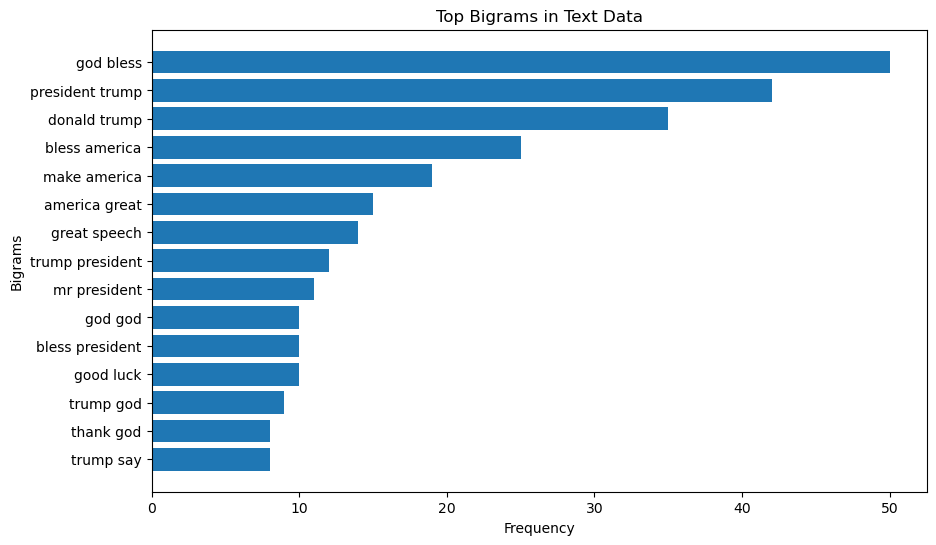

[(('god', 'bless'), 50),
 (('president', 'trump'), 42),
 (('donald', 'trump'), 35),
 (('bless', 'america'), 25),
 (('make', 'america'), 19),
 (('america', 'great'), 15),
 (('great', 'speech'), 14),
 (('trump', 'president'), 12),
 (('mr', 'president'), 11),
 (('god', 'god'), 10),
 (('bless', 'president'), 10),
 (('good', 'luck'), 10),
 (('trump', 'god'), 9),
 (('thank', 'god'), 8),
 (('trump', 'say'), 8)]

In [17]:
plot_top_bigrams(left_2025_cleaned, 'filtered_comment', top_n=15, plot_title="Top Bigrams in Text Data")
plot_top_bigrams(left_2016_cleaned, 'filtered_comment', top_n=15, plot_title="Top Bigrams in Text Data")
plot_top_bigrams(right_2025_cleaned, 'filtered_comment', top_n=15, plot_title="Top Bigrams in Text Data")
plot_top_bigrams(right_2016_cleaned, 'filtered_comment', top_n=15, plot_title="Top Bigrams in Text Data")



---


# DETECTING TOPICS with BERTopic



In [19]:
merged_comments = pd.concat([left_2025_cleaned, left_2016_cleaned, right_2025_cleaned, right_2016_cleaned], axis=0)

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount,processed_comment,filtered_comment
0,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@leeannalynn55,Love Trump! Best president of my lifetime!,2025-01-22T14:19:40Z,0,0,love trump best president lifetime,love trump best president lifetime
1,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@Theotherside111,Males and females 👏🏻👏🏻👏🏻👏🏻,2025-01-22T14:18:42Z,0,0,male female,male female
2,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@lindaed3594,"WOW, that is surely really significant: Martin...",2025-01-22T14:13:08Z,0,0,wow surely really significant martin luther ki...,wow surely really martin luther king today jan...
3,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@maribelcapano4600,"I love he speech, no paper or nothing. He just...",2025-01-22T14:13:05Z,0,0,love speech paper nothing,love speech paper nothing
4,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@BahzillaJr,"the entire ""elites"" people thought the democra...",2025-01-22T14:12:34Z,0,0,entire elites people think democrat literally ...,entire people think democrat literally trump l...
...,...,...,...,...,...,...,...,...,...,...
640,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@1966Hemi426,It's not often I shed a tear but I did today. ...,2017-01-20 17:38:47+00:00,47,538,often shed tear today truly hope america futur...,today truly hope america future thank god bles...
641,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@oldschoolwrestling1808,OH HELL YEAH\nAmerica has just been blessed an...,2017-01-20 17:37:48+00:00,0,12,oh hell yeah america bless ready kick as rock,hell yeah america bless as
642,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@keitsi87,Trump is in way over his head. Poor guy.,2017-01-20 17:36:59+00:00,4,9,trump way head poor guy,trump way head poor guy
643,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@steeny1234,"WOW, TRUMP WAS POLITE BECAUSE WE ALL KNOW THAT...",2017-01-20 17:36:24+00:00,13,62,wow trump polite know barry fraud trying hard ...,wow trump know hard make sure get far


In [137]:

comments = merged_comments['filtered_comment'].tolist()
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight, fast model
embeddings = model.encode(comments, show_progress_bar=True)

Initialize BERTopic with adjusted parameters
#min_topic_size=20: Ensures that each topic contains at least 20 comments.
#We Manually Adjuste This to prevents the creation of too many small, less meaningful topics.

topic_model = BERTopic(min_topic_size=20 ,nr_topics=45, verbose=True)

# Fit the BERTopic model and get topics
topics, probs = topic_model.fit_transform(comments, embeddings)




topic_info = topic_model.get_topic_info()  # Overview of all topics
print(topic_info)


actual_topics = topic_info['Topic'].unique()  # Get unique topic IDs


Batches:   0%|          | 0/266 [00:00<?, ?it/s]

2025-01-25 19:09:14,061 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-25 19:09:24,135 - BERTopic - Dimensionality - Completed ✓
2025-01-25 19:09:24,151 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-25 19:09:24,895 - BERTopic - Cluster - Completed ✓
2025-01-25 19:09:24,910 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-25 19:09:25,194 - BERTopic - Representation - Completed ✓
2025-01-25 19:09:25,194 - BERTopic - Topic reduction - Reducing number of topics
2025-01-25 19:09:25,428 - BERTopic - Topic reduction - Reduced number of topics from 107 to 45


    Topic  Count                                  Name  \
0      -1   2581         -1_trump_president_people_god   
1       0    773         0_bless_god_america_president   
2       1    603                  1_man_bravo_lfg_good   
3       2    547          2_biden_harris_clap_democrat   
4       3    509     3_speech_inauguration_obama_great   
5       4    493        4_president_welcome_back_trump   
6       5    285               5_kamala_look_biden_joe   
7       6    223       6_pardon_felon_criminal_convict   
8       7    210                  7_win_look_go_listen   
9       8    200               8_cnn_news_fake_network   
10      9    175                9_amen_god_praise_lord   
11     10    164       10_black_white_crowd_liberation   
12     11    141            11_day_year_hope_nightmare   
13     12    133           12_tariff_pay_revenue_money   
14     13    105               13_maga_baby_back_cease   
15     14     91            14_lie_promise_liar_number   
16     15     

In [138]:
# Display all topics with their keywords
for topic_num in actual_topics:
    print(f"Topic {topic_num}:")
    print(topic_model.get_topic(topic_num))
    print("\n")


Topic -1:
[('trump', 0.032019573188075655), ('president', 0.016023140682428383), ('people', 0.014251220161114145), ('god', 0.01347472672481578), ('america', 0.012830492297280923), ('country', 0.012001476782878068), ('go', 0.011399768750704985), ('american', 0.011311696297316924), ('world', 0.01080992840326731), ('get', 0.010748878627457133)]


Topic 0:
[('bless', 0.04214852723103295), ('god', 0.03969251312331089), ('america', 0.03625722610581781), ('president', 0.019576946837392705), ('great', 0.018920994015895906), ('country', 0.018501610362072235), ('make', 0.01679061344781885), ('american', 0.01629694919018899), ('world', 0.016058308439202175), ('donald', 0.016005069530456474)]


Topic 1:
[('man', 0.16079618367694182), ('bravo', 0.1417651655294187), ('lfg', 0.13358589075173186), ('good', 0.124018371963992), ('amazing', 0.10564989247543306), ('thanks', 0.10077750759859327), ('speach', 0.0945101103529458), ('awesome', 0.0807591570356794), ('thank', 0.08006462670672818), ('luck', 0.066

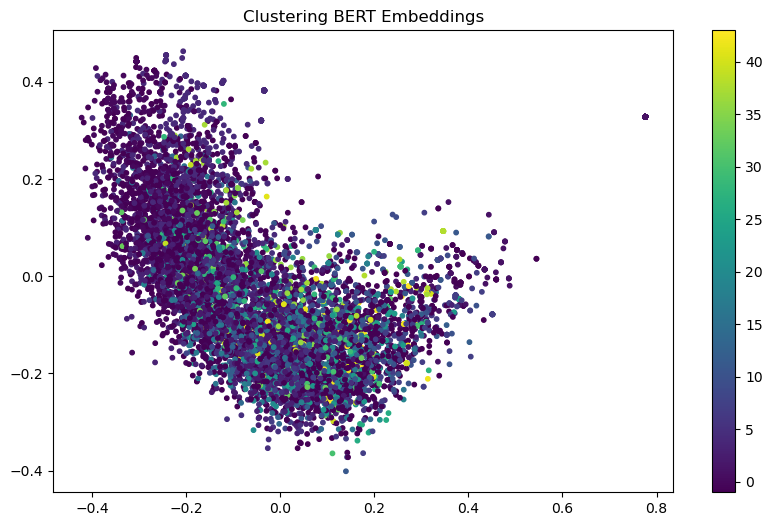

2025-01-25 19:09:26,554 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [139]:
# Visualize topics in an interactive plot
topic_model.visualize_topics()

# Scatter plot with PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Scatter plot for topics
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=topics, cmap="viridis", s=10)
plt.colorbar()
plt.title("Clustering BERT Embeddings")
plt.show()


# Save the BERTopic model for future use
topic_model.save("bertopic_model")

In [140]:
# DataFrame with comments and their assigned topics
topic_assignments = pd.DataFrame({
    "comment": comments,  # The original comments
    "topic": topics       # The topic each comment belongs to
})

topic_assignments

,comment,topic
0,love trump best president lifetime,-1
1,male female,16
2,wow surely really martin luther king today jan...,10
3,love speech paper nothing,-1
4,entire people think democrat literally trump l...,32
...,...,...
8499,today truly hope america future thank god bles...,0
8500,hell yeah america bless as,0
8501,trump way head poor guy,-1
8502,wow trump know hard make sure get far,-1


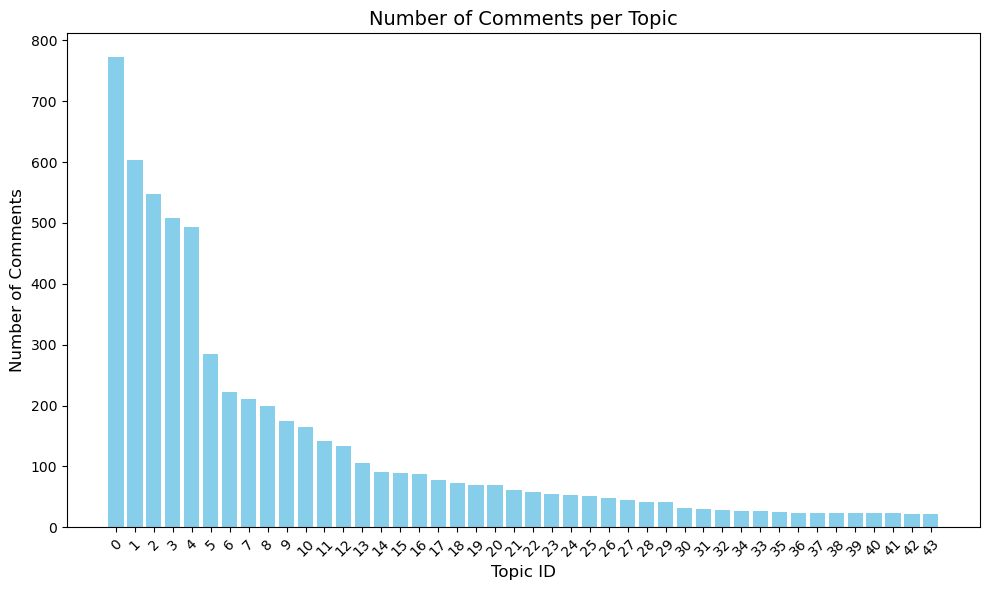

In [141]:
#Visualizing topics and the comments they conatin

topic_counts = topic_info[['Topic', 'Count']]  # Extract Topic IDs and Counts
topic_counts = topic_counts[topic_counts['Topic'] != -1]  # Exclude noise topic (-1)

# Sort topics by count in descending order
topic_counts = topic_counts.sort_values(by='Count', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(topic_counts['Topic'].astype(str), topic_counts['Count'], color='skyblue')
plt.xlabel("Topic ID", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.title("Number of Comments per Topic", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Infer topic distributions for the unseen comments of each video**

### Right 2016


In [144]:
# Load the trained BERTopic model
topic_model = BERTopic.load("bertopic_model")  # Ensure this file exists


comments_to_infer_right_2016 = right_2016_cleaned['filtered_comment'].tolist()


# Use the same embeddings used during training for consistency
model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings_to_infer_right_2016 = model.encode(comments_to_infer_right_2016, show_progress_bar=True)

# Infer topics and probabilities for these comments
topic_model.calculate_probabilities = True  # Ensure probabilities are calculated
inferred_topics, inferred_probs = topic_model.transform(comments_to_infer_right_2016, embeddings=embeddings_to_infer_right_2016)


right_2016_cleaned['inferred_topic'] = inferred_topics  # Add inferred topic IDs


# Create a DataFrame for the probabilities
probs_df_right_2016 = pd.DataFrame(inferred_probs, columns=[f"Topic_{i}" for i in range(len(inferred_probs[0]))])
probs_df_right_2016['comment'] = comments_to_infer_right_2016
probs_df_right_2016

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-01-25 19:09:38,132 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-01-25 19:09:38,497 - BERTopic - Dimensionality - Completed ✓
2025-01-25 19:09:38,497 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-01-25 19:09:38,562 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-01-25 19:09:39,456 - BERTopic - Probabilities - Completed ✓
2025-01-25 19:09:39,456 - BERTopic - Cluster - Completed ✓


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_35,Topic_36,Topic_37,Topic_38,Topic_39,Topic_40,Topic_41,Topic_42,Topic_43,comment
0,5.263983e-05,6.842050e-06,5.756063e-06,2.443296e-05,2.969883e-05,6.555886e-06,1.206818e-06,2.443391e-05,4.002535e-07,5.811672e-01,...,3.020356e-06,4.359079e-06,4.133207e-07,9.712468e-07,3.114383e-06,3.275531e-06,3.932070e-07,6.614771e-03,3.715752e-06,god
1,4.862274e-41,9.789256e-01,2.084761e-41,2.761083e-41,3.237060e-41,1.034170e-41,6.964713e-42,2.408798e-41,3.342017e-42,1.297352e-41,...,3.309134e-42,3.272193e-42,3.199888e-42,3.376932e-42,3.336451e-42,3.416157e-42,3.332550e-42,3.314184e-42,3.386554e-42,
2,2.923830e-02,8.441085e-33,2.030497e-03,2.276835e-03,2.098272e-02,1.983755e-03,2.349212e-45,3.312327e-32,5.165226e-46,6.908785e-42,...,2.341681e-03,6.477990e-29,5.864048e-46,1.824841e-45,2.196650e-03,4.657961e-33,4.890419e-46,2.155284e-42,5.138789e-33,trump clean cabinet clean like clean man go ti...
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,think president trump well best
4,2.732339e-02,3.960022e-01,1.172089e-02,1.552593e-02,1.818872e-02,5.814817e-03,3.915110e-03,1.354976e-02,1.878199e-03,7.293781e-03,...,1.859615e-03,1.839108e-03,1.797137e-03,1.899732e-03,1.875079e-03,1.921404e-03,1.872457e-03,1.863705e-03,1.904512e-03,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,today truly hope america future thank god bles...
506,7.352594e-01,2.824527e-04,4.841948e-04,7.708053e-04,1.157892e-03,2.603144e-04,1.755150e-04,6.669674e-04,8.012760e-05,4.336484e-04,...,1.048954e-04,1.215913e-04,8.915252e-05,9.025432e-05,1.155829e-04,9.387585e-05,8.618292e-05,1.080651e-04,1.015086e-04,hell yeah america bless as
507,8.374760e-39,1.777277e-45,5.012244e-48,7.096259e-45,8.338305e-39,1.138830e-43,2.173374e-51,6.901390e-45,5.366952e-52,6.901092e-49,...,6.603802e-01,9.520514e-45,6.161556e-52,1.438567e-51,4.251661e-48,1.013420e-45,4.576276e-52,2.250823e-49,1.068389e-45,trump way head poor guy
508,5.920655e-02,1.141858e-14,1.419832e-13,2.028900e-13,7.450552e-01,1.517479e-13,3.601534e-16,4.392629e-14,1.036111e-16,4.768713e-15,...,9.346386e-14,1.066409e-14,1.217950e-16,1.917584e-16,7.255111e-13,6.407992e-15,9.038051e-17,1.523438e-15,6.777172e-15,wow trump know hard make sure get far


In [145]:
topic_columns_right_2016 = [col for col in probs_df_right_2016.columns if col.startswith("Topic_")]
cumulative_probabilities_right_2016 = probs_df_right_2016[topic_columns_right_2016].mean()

# Normalize the probabilities to sum to 1 for better interpretability
normalized_probabilities_right_2016 = cumulative_probabilities_right_2016 / cumulative_probabilities_right_2016.sum()

# print the cumulative probabilities for each topic
for topic, cumulative_prob in normalized_probabilities_right_2016.items():
    print(f"{topic}: {cumulative_prob:.4f}")

Topic_0: 0.1713
Topic_1: 0.0920
Topic_2: 0.0128
Topic_3: 0.1769
Topic_4: 0.1015
Topic_5: 0.0126
Topic_6: 0.0021
Topic_7: 0.0958
Topic_8: 0.0006
Topic_9: 0.0349
Topic_10: 0.0202
Topic_11: 0.0394
Topic_12: 0.0602
Topic_13: 0.0011
Topic_14: 0.0112
Topic_15: 0.0093
Topic_16: 0.0045
Topic_17: 0.0006
Topic_18: 0.0206
Topic_19: 0.0140
Topic_20: 0.0008
Topic_21: 0.0007
Topic_22: 0.0007
Topic_23: 0.0038
Topic_24: 0.0008
Topic_25: 0.0151
Topic_26: 0.0005
Topic_27: 0.0009
Topic_28: 0.0091
Topic_29: 0.0012
Topic_30: 0.0039
Topic_31: 0.0004
Topic_32: 0.0102
Topic_33: 0.0099
Topic_34: 0.0027
Topic_35: 0.0115
Topic_36: 0.0160
Topic_37: 0.0007
Topic_38: 0.0116
Topic_39: 0.0027
Topic_40: 0.0035
Topic_41: 0.0006
Topic_42: 0.0084
Topic_43: 0.0027


### Right 2025

In [147]:
# RIGHT_2025

# 
comments_to_infer_right_2025 = right_2025_cleaned['filtered_comment'].tolist()

# 
# Use the same model you used during training for consistency
model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings_to_infer_right_2025 = model.encode(comments_to_infer_right_2025, show_progress_bar=True)

# Infer topics and probabilities for these comments
topic_model.calculate_probabilities = True  # Ensure probabilities are calculated
inferred_topics, inferred_probs = topic_model.transform(comments_to_infer_right_2025, embeddings=embeddings_to_infer_right_2025)


right_2025_cleaned['inferred_topic'] = inferred_topics  # Add inferred topic IDs

#
# Create a DataFrame for the probabilities
probs_df_right_2025 = pd.DataFrame(inferred_probs, columns=[f"Topic_{i}" for i in range(len(inferred_probs[0]))])
probs_df_right_2025['comment'] = comments_to_infer_right_2025
probs_df_right_2025

Batches:   0%|          | 0/108 [00:00<?, ?it/s]

2025-01-25 19:09:56,269 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-01-25 19:09:58,062 - BERTopic - Dimensionality - Completed ✓
2025-01-25 19:09:58,062 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-01-25 19:09:58,451 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-01-25 19:10:03,667 - BERTopic - Probabilities - Completed ✓
2025-01-25 19:10:03,667 - BERTopic - Cluster - Completed ✓


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_35,Topic_36,Topic_37,Topic_38,Topic_39,Topic_40,Topic_41,Topic_42,Topic_43,comment
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,thank god president donald trump back office g...
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,goodness true love
2,1.405781e-02,2.479629e-03,3.385832e-03,1.886201e-01,9.291861e-03,2.945093e-03,1.025621e-03,8.457688e-03,2.994199e-04,2.701997e-03,...,1.090439e-03,1.180194e-03,3.175646e-04,4.546426e-04,1.083673e-03,1.081853e-03,2.960997e-04,7.977333e-04,1.138093e-03,bad speech ever always lack lack job lie lie l...
3,4.986104e-03,5.008747e-04,2.476488e-04,2.023083e-03,2.518271e-03,4.970265e-04,7.140618e-48,1.856054e-03,9.121171e-50,1.278697e-03,...,2.526990e-04,3.787980e-04,9.803894e-50,5.780161e-40,2.534148e-04,2.523470e-04,8.660070e-50,3.653598e-04,2.783805e-04,trump hand bible take oath
4,1.378996e-03,1.769818e-05,6.948202e-05,1.330738e-04,1.064550e-03,7.329525e-05,1.492422e-06,6.797661e-05,3.891218e-07,1.094136e-05,...,5.188312e-05,1.338886e-05,4.401612e-07,6.460729e-07,8.602761e-01,9.909250e-06,3.992939e-07,3.422659e-06,1.104541e-05,trump announce billion infrastructure look cut...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,2.811996e-02,5.288093e-03,1.018438e-02,1.287937e-02,1.821855e-02,5.036002e-03,3.296299e-03,1.250197e-02,1.761071e-03,7.181848e-03,...,1.920029e-03,1.902036e-03,1.862914e-03,1.625332e-03,1.929074e-03,1.897467e-03,1.760760e-03,1.879519e-03,1.992564e-03,golden age
3424,3.652992e-02,3.048702e-01,1.565789e-02,2.073489e-02,2.431826e-02,7.768205e-03,5.228921e-03,1.810179e-02,2.511488e-03,9.752688e-03,...,2.485624e-03,2.458410e-03,2.403714e-03,2.538960e-03,2.505991e-03,2.567533e-03,2.503594e-03,2.491282e-03,2.545053e-03,
3425,1.967298e-105,4.111458e-02,1.909146e-106,2.353351e-01,1.360189e-105,4.003459e-106,6.048197e-192,1.480877e-01,1.135144e-192,3.393689e-187,...,1.749406e-106,1.928558e-106,1.155042e-192,5.601781e-192,1.782398e-106,1.831029e-02,1.118152e-192,1.129976e-187,1.903297e-02,beautiful speech
3426,4.580995e-01,4.727981e-15,3.921983e-14,6.438649e-14,1.829734e-02,4.281453e-14,1.463202e-16,1.789121e-14,4.099839e-17,2.328364e-15,...,2.357989e-14,5.674569e-15,4.740851e-17,8.879186e-17,2.484628e-13,2.474120e-15,4.099300e-17,7.049957e-16,2.706174e-15,god bless true patriot evil


In [148]:
#RIGTH 2025
topic_columns_right_2025 = [col for col in probs_df_right_2025.columns if col.startswith("Topic_")]
cumulative_probabilities_right_2025 = probs_df_right_2025[topic_columns_right_2025].mean()

# Step 3: Normalize the probabilities to sum to 1
normalized_probabilities_right_2025 = cumulative_probabilities_right_2025 / cumulative_probabilities_right_2025.sum()

# Print each topic and its normalized cumulative probability
for topic, cumulative_prob in normalized_probabilities_right_2025.items():
    print(f"{topic}: {cumulative_prob:.4f}")

Topic_0: 0.1469
Topic_1: 0.0796
Topic_2: 0.0963
Topic_3: 0.0722
Topic_4: 0.0987
Topic_5: 0.0593
Topic_6: 0.0153
Topic_7: 0.0506
Topic_8: 0.0013
Topic_9: 0.0471
Topic_10: 0.0065
Topic_11: 0.0251
Topic_12: 0.0326
Topic_13: 0.0084
Topic_14: 0.0106
Topic_15: 0.0152
Topic_16: 0.0093
Topic_17: 0.0071
Topic_18: 0.0143
Topic_19: 0.0126
Topic_20: 0.0135
Topic_21: 0.0050
Topic_22: 0.0113
Topic_23: 0.0053
Topic_24: 0.0075
Topic_25: 0.0175
Topic_26: 0.0032
Topic_27: 0.0080
Topic_28: 0.0134
Topic_29: 0.0042
Topic_30: 0.0096
Topic_31: 0.0060
Topic_32: 0.0025
Topic_33: 0.0062
Topic_34: 0.0067
Topic_35: 0.0106
Topic_36: 0.0086
Topic_37: 0.0064
Topic_38: 0.0062
Topic_39: 0.0115
Topic_40: 0.0088
Topic_41: 0.0047
Topic_42: 0.0088
Topic_43: 0.0052


### Left 2016

In [150]:

comments_to_infer_left_2016 = left_2016_cleaned['filtered_comment'].tolist()


# Use the same model you used during training for consistency
model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings_to_inferr_left_2016 = model.encode(comments_to_infer_left_2016, show_progress_bar=True)

# Infer topics and probabilities for these comments
topic_model.calculate_probabilities = True  # Ensure probabilities are calculated
inferred_topics, inferred_probs = topic_model.transform(comments_to_infer_left_2016, embeddings=embeddings_to_inferr_left_2016)


left_2016_cleaned['inferred_topic'] = inferred_topics  # Add inferred topic IDs


# Create a DataFrame for the probabilities
probs_df_left_2016 = pd.DataFrame(inferred_probs, columns=[f"Topic_{i}" for i in range(len(inferred_probs[0]))])
probs_df_left_2016['comment'] = comments_to_infer_left_2016
probs_df_left_2016

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2025-01-25 19:10:11,305 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-01-25 19:10:11,784 - BERTopic - Dimensionality - Completed ✓
2025-01-25 19:10:11,784 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-01-25 19:10:11,870 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-01-25 19:10:13,035 - BERTopic - Probabilities - Completed ✓
2025-01-25 19:10:13,035 - BERTopic - Cluster - Completed ✓


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_35,Topic_36,Topic_37,Topic_38,Topic_39,Topic_40,Topic_41,Topic_42,Topic_43,comment
0,9.072677e-01,4.649800e-09,6.427889e-09,2.077636e-08,4.620282e-08,7.212015e-09,9.750527e-10,1.673891e-08,3.362303e-10,6.067591e-09,...,4.204061e-09,3.604192e-09,3.589967e-10,5.785896e-10,5.894035e-09,2.343818e-09,3.339249e-10,1.744662e-09,2.653353e-09,great day history finally man change good god ...
1,6.275965e-03,7.428787e-04,5.742099e-04,3.640007e-03,7.040601e-03,1.110542e-03,3.521082e-24,2.824734e-03,6.202974e-25,1.254206e-03,...,7.441066e-04,5.538959e-04,8.040953e-25,3.802637e-24,5.160275e-04,4.122993e-04,5.314017e-25,4.076427e-04,4.310449e-04,trump trump trump trump trump trump trump trum...
2,7.422932e-04,9.177940e-03,7.087525e-05,8.884661e-05,5.076761e-04,1.433881e-04,2.197593e-09,7.390890e-02,4.464196e-10,3.489745e-07,...,6.959052e-05,7.668376e-05,4.914468e-10,1.339272e-09,6.863743e-05,9.937591e-03,4.337379e-10,1.120989e-07,1.072111e-02,veteran school watch make school policy read h...
3,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,look bane speech
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,
769,2.368315e-02,4.706294e-01,1.014771e-02,1.344813e-02,1.576274e-02,5.033439e-03,3.392296e-03,1.172659e-02,1.626543e-03,6.316730e-03,...,1.611364e-03,1.593512e-03,1.558107e-03,1.643769e-03,1.625248e-03,1.662753e-03,1.623607e-03,1.613420e-03,1.648705e-03,
770,5.824577e-219,1.291360e-212,5.516719e-220,1.471936e-218,3.802890e-219,1.095128e-219,5.973905e-222,4.951713e-01,1.660772e-222,2.055142e-220,...,4.904670e-220,5.408006e-220,1.539955e-222,5.880698e-222,5.205467e-220,1.330517e-143,1.612984e-222,7.529203e-221,8.501216e-211,say
771,7.654231e-01,3.775462e-04,6.809575e-04,2.059259e-03,1.853577e-02,7.432271e-04,9.483461e-05,1.383955e-03,2.745380e-05,4.050848e-04,...,5.076402e-04,3.010623e-04,3.126753e-05,4.186343e-05,9.064932e-04,1.964793e-04,2.711985e-05,1.214759e-04,2.191360e-04,say american get want well remember real cause...


In [151]:
topic_columns_left_2016 = [col for col in probs_df_left_2016.columns if col.startswith("Topic_")]
cumulative_probabilities_left_2016 = probs_df_left_2016[topic_columns_left_2016].mean()

# Step 3: Normalize the probabilities to sum to 1
normalized_probabilities_left_2016 = cumulative_probabilities_left_2016 / cumulative_probabilities_left_2016.sum()

# Step 4: Print each topic and its normalized cumulative probability
for topic, cumulative_prob in normalized_probabilities_left_2016.items():
    print(f"{topic}: {cumulative_prob:.4f}")

Topic_0: 0.1340
Topic_1: 0.1342
Topic_2: 0.0117
Topic_3: 0.1172
Topic_4: 0.1297
Topic_5: 0.0119
Topic_6: 0.0020
Topic_7: 0.0942
Topic_8: 0.0022
Topic_9: 0.0094
Topic_10: 0.0494
Topic_11: 0.0359
Topic_12: 0.0536
Topic_13: 0.0119
Topic_14: 0.0208
Topic_15: 0.0160
Topic_16: 0.0076
Topic_17: 0.0008
Topic_18: 0.0300
Topic_19: 0.0101
Topic_20: 0.0008
Topic_21: 0.0006
Topic_22: 0.0007
Topic_23: 0.0007
Topic_24: 0.0008
Topic_25: 0.0127
Topic_26: 0.0005
Topic_27: 0.0009
Topic_28: 0.0121
Topic_29: 0.0125
Topic_30: 0.0148
Topic_31: 0.0004
Topic_32: 0.0010
Topic_33: 0.0008
Topic_34: 0.0027
Topic_35: 0.0214
Topic_36: 0.0039
Topic_37: 0.0006
Topic_38: 0.0034
Topic_39: 0.0029
Topic_40: 0.0048
Topic_41: 0.0006
Topic_42: 0.0052
Topic_43: 0.0129


### Left 2025

In [153]:
# LEFT_2025

comments_to_infer_left_2025 = left_2025_cleaned['filtered_comment'].tolist()


# Use the same model you used during training for consistency
model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings_to_infer_left_2025 = model.encode(comments_to_infer_left_2025, show_progress_bar=True)

#Infer topics and probabilities for these comments
topic_model.calculate_probabilities = True  # Ensure probabilities are calculated
inferred_topics, inferred_probs = topic_model.transform(comments_to_infer_left_2025, embeddings=embeddings_to_infer_left_2025)

# Add inferred topics to the DataFrame
left_2025_cleaned['inferred_topic'] = inferred_topics  # Add inferred topic IDs


# Create a DataFrame for the probabilities
probs_df_left_2025 = pd.DataFrame(inferred_probs, columns=[f"Topic_{i}" for i in range(len(inferred_probs[0]))])
probs_df_left_2025['comment'] = comments_to_infer_left_2025
probs_df_left_2025

Batches:   0%|          | 0/119 [00:00<?, ?it/s]

2025-01-25 19:10:32,597 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-01-25 19:10:34,464 - BERTopic - Dimensionality - Completed ✓
2025-01-25 19:10:34,464 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-01-25 19:10:34,829 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-01-25 19:10:40,535 - BERTopic - Probabilities - Completed ✓
2025-01-25 19:10:40,535 - BERTopic - Cluster - Completed ✓


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_35,Topic_36,Topic_37,Topic_38,Topic_39,Topic_40,Topic_41,Topic_42,Topic_43,comment
0,1.046694e-15,1.748539e-11,8.140106e-17,7.576349e-11,1.096592e-15,3.064048e-01,5.286572e-24,6.627432e-11,1.181675e-24,1.323226e-20,...,9.963217e-17,1.046353e-07,1.487656e-24,3.828964e-24,8.088478e-17,9.405174e-12,1.090989e-24,4.230845e-21,9.954728e-12,love trump best president lifetime
1,3.912968e-02,9.950471e-03,1.772705e-02,2.388616e-02,2.729009e-02,9.668052e-03,6.096958e-03,2.332825e-02,2.910202e-03,1.023632e-02,...,2.908666e-03,2.731603e-03,2.431462e-03,2.804309e-03,2.816275e-03,3.413905e-03,2.306300e-03,2.828458e-03,3.171180e-03,male female
2,6.378956e-02,1.025485e-02,1.834398e-02,3.492213e-02,4.158239e-02,1.252118e-02,6.790308e-03,3.181119e-02,2.349836e-03,1.371505e-02,...,4.848987e-03,4.466807e-03,2.268578e-03,2.953399e-03,5.003292e-03,4.604009e-03,2.077650e-03,3.956702e-03,4.951333e-03,wow surely really martin luther king today jan...
3,7.923367e-03,1.783129e-03,2.920319e-03,8.214449e-03,5.108949e-03,1.693927e-03,1.047251e-03,4.680566e-03,3.745843e-04,2.032718e-03,...,5.419277e-04,5.983710e-04,3.817399e-04,5.028161e-04,5.516393e-04,5.734988e-04,3.751851e-04,5.548955e-04,5.982916e-04,love speech paper nothing
4,6.621899e-03,1.014854e-03,2.372968e-03,3.364062e-03,4.724364e-03,1.380560e-03,8.277730e-04,2.944504e-03,3.021201e-04,1.355054e-03,...,6.995729e-04,4.569936e-04,3.164417e-04,2.965873e-04,6.034281e-04,4.544969e-04,2.565661e-04,3.818071e-04,4.834514e-04,entire people think democrat literally trump l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,2.277191e-02,2.025242e-03,3.498028e-03,7.618636e-03,2.069331e-02,2.623360e-03,1.059259e-03,6.011452e-03,4.180663e-04,3.078072e-03,...,1.314994e-03,1.578262e-03,4.891043e-04,5.218753e-04,1.242741e-03,8.548155e-04,3.926519e-04,8.477676e-04,9.203590e-04,good guy back office great day
3789,7.142077e-11,1.282473e-11,2.695803e-11,3.593351e-11,9.193330e-01,1.514877e-11,9.041359e-12,3.017132e-11,4.546890e-12,1.628926e-11,...,5.949425e-12,5.045131e-12,5.342489e-12,3.817692e-12,4.831388e-12,4.463161e-12,3.627980e-12,4.302030e-12,4.515842e-12,trump
3790,1.437399e-03,1.918042e-05,7.040086e-05,1.380440e-04,1.083415e-03,7.510663e-05,1.576733e-06,7.334573e-05,4.221125e-07,1.185959e-05,...,5.081585e-05,1.398847e-05,4.704318e-07,7.032035e-07,8.581479e-01,1.069302e-05,4.542649e-07,3.707419e-06,1.197486e-05,world deportation
3791,9.798383e-04,2.104498e-04,3.904103e-04,5.537271e-04,6.158818e-04,1.997272e-04,1.288744e-04,6.702683e-04,7.882964e-09,2.422711e-04,...,6.393523e-05,6.760666e-05,6.894723e-09,1.048959e-04,6.701408e-05,9.344040e-05,4.685853e-09,8.844306e-05,9.067308e-05,nope


In [154]:
topic_columns_left_2025 = [col for col in probs_df_left_2025.columns if col.startswith("Topic_")]
cumulative_probabilities_left_2025 = probs_df_left_2025[topic_columns_left_2025].mean()

# Normalize the probabilities to sum to 1
normalized_probabilities_left_2025 = cumulative_probabilities_left_2025 / cumulative_probabilities_left_2025.sum()

# Print each topic and its normalized cumulative probability
for topic, cumulative_prob in normalized_probabilities_left_2025.items():
    print(f"{topic}: {cumulative_prob:.4f}")

Topic_0: 0.1188
Topic_1: 0.0747
Topic_2: 0.0730
Topic_3: 0.0657
Topic_4: 0.0833
Topic_5: 0.0474
Topic_6: 0.0294
Topic_7: 0.0644
Topic_8: 0.0463
Topic_9: 0.0335
Topic_10: 0.0189
Topic_11: 0.0315
Topic_12: 0.0383
Topic_13: 0.0091
Topic_14: 0.0220
Topic_15: 0.0180
Topic_16: 0.0158
Topic_17: 0.0031
Topic_18: 0.0165
Topic_19: 0.0112
Topic_20: 0.0013
Topic_21: 0.0159
Topic_22: 0.0123
Topic_23: 0.0043
Topic_24: 0.0067
Topic_25: 0.0153
Topic_26: 0.0101
Topic_27: 0.0099
Topic_28: 0.0077
Topic_29: 0.0057
Topic_30: 0.0074
Topic_31: 0.0061
Topic_32: 0.0080
Topic_33: 0.0042
Topic_34: 0.0082
Topic_35: 0.0090
Topic_36: 0.0043
Topic_37: 0.0046
Topic_38: 0.0024
Topic_39: 0.0047
Topic_40: 0.0081
Topic_41: 0.0065
Topic_42: 0.0076
Topic_43: 0.0088


# SENTIMENT ANALYSIS

## TOPIC_0

Left 2025

In [269]:
topic_0_comments_left_2025 = left_2025_cleaned[left_2025_cleaned["inferred_topic"] == 0].copy()
# Apply the sentiment function to the filtered comments
topic_0_comments_left_2025 ['sentiment'] = topic_0_comments_left_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_left_2025 = topic_0_comments_left_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2025 = topic_0_comments_left_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 0 are mostly {most_common_sentiment_left_2025}.')

sentiment = pd.DataFrame(columns=['video_left_2025'])
# Add the most_common_sentiment for 'topic_0' to the dataset
sentiment.loc['topic_0'] = [average_sentiment_score_left_2025]

sentiment


The comments for topic 0 are mostly positive.


,video_left_2025
topic_0,0.403584


 Right 2025

In [272]:
topic_0_comments_right_2025 = right_2025_cleaned[right_2025_cleaned["inferred_topic"] == 0].copy()
# Apply the sentiment function to the filtered comments
topic_0_comments_right_2025 ['sentiment'] = topic_0_comments_right_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_right_2025 = topic_0_comments_right_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2025 = topic_0_comments_right_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 0 are mostly {most_common_sentiment_right_2025 }.')

sentiment['video_right_2025'] = None  # Add the column with initial values
sentiment.loc['topic_0', 'video_right_2025'] = average_sentiment_score_right_2025
sentiment

The comments for topic 0 are mostly positive.


,video_left_2025,video_right_2025
topic_0,0.403584,0.634187


 Left 2016

In [274]:
topic_0_comments_left_2016 = left_2016_cleaned[left_2016_cleaned["inferred_topic"] == 0].copy()
# Apply the sentiment function to the filtered comments
topic_0_comments_left_2016['sentiment'] = topic_0_comments_left_2016['comment'].apply(get_sentiment)

average_sentiment_score_left_2016 = topic_0_comments_left_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2016 = topic_0_comments_left_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 0 are mostly {most_common_sentiment_left_2016}.')

sentiment['video_left_2016'] = None  # Add the column with initial values
sentiment.loc['topic_0', 'video_left_2016'] = average_sentiment_score_left_2016
sentiment


The comments for topic 0 are mostly positive.


,video_left_2025,video_right_2025,video_left_2016
topic_0,0.403584,0.634187,0.261302


Right 2016

In [276]:
topic_0_comments_right_2016 = right_2016_cleaned[right_2016_cleaned["inferred_topic"] == 0].copy()
# Apply the sentiment function to the filtered comments
topic_0_comments_right_2016['sentiment'] = topic_0_comments_right_2016['comment'].apply(get_sentiment)

average_sentiment_score_right_2016 = topic_0_comments_right_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2016 = topic_0_comments_right_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 0 are mostly {most_common_sentiment_right_2016}.')

sentiment['video_right_2016'] = None  # Add the column with initial values
sentiment.loc['topic_0', 'video_right_2016'] = average_sentiment_score_right_2016
sentiment

The comments for topic 0 are mostly positive.


,video_left_2025,video_right_2025,video_left_2016,video_right_2016
topic_0,0.403584,0.634187,0.261302,0.598651


## TOPIC_2

In [278]:
topic_2_comments_left_2025 = left_2025_cleaned[left_2025_cleaned["inferred_topic"] == 2].copy()
# Apply the sentiment function to the filtered comments
topic_2_comments_left_2025 ['sentiment'] = topic_2_comments_left_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_left_2025 = topic_2_comments_left_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2025 = topic_2_comments_left_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 2 are mostly {most_common_sentiment_left_2025}.')

The comments for topic 2 are mostly positive.


In [279]:
topic_2_comments_right_2025 = right_2025_cleaned[right_2025_cleaned["inferred_topic"] == 2].copy()
# Apply the sentiment function to the filtered comments
topic_2_comments_right_2025 ['sentiment'] = topic_2_comments_right_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_right_2025 = topic_2_comments_right_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2025 = topic_2_comments_right_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 2 are mostly {most_common_sentiment_right_2025 }.')

The comments for topic 2 are mostly negative.


In [280]:
topic_2_comments_left_2016 = left_2016_cleaned[left_2016_cleaned["inferred_topic"] == 2].copy()
# Apply the sentiment function to the filtered comments
topic_2_comments_left_2016['sentiment'] = topic_2_comments_left_2016['comment'].apply(get_sentiment)

average_sentiment_score_left_2016 = topic_2_comments_left_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2016 = topic_2_comments_left_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 2 are mostly {most_common_sentiment_left_2016}.')

The comments for topic 2 are mostly positive.


In [281]:
topic_2_comments_right_2016 = right_2016_cleaned[right_2016_cleaned["inferred_topic"] == 2].copy()
# Apply the sentiment function to the filtered comments
topic_2_comments_right_2016['sentiment'] = topic_2_comments_right_2016['comment'].apply(get_sentiment)

average_sentiment_score_right_2016 = topic_2_comments_right_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2016 = topic_2_comments_right_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 2 are mostly {most_common_sentiment_right_2016}.')

The comments for topic 2 are mostly negative.


In [282]:
sentiment.loc['topic_2'] = {
    'video_left_2025': average_sentiment_score_left_2025,
    'video_right_2025': average_sentiment_score_right_2025,
    'video_left_2016': average_sentiment_score_left_2016,
    'video_right_2016': average_sentiment_score_right_2016
}
sentiment

,video_left_2025,video_right_2025,video_left_2016,video_right_2016
topic_0,0.403584,0.634187,0.261302,0.598651
topic_2,0.038780,0.00629,0.32985,0.013533


## TOPIC 3

In [284]:
topic_3_comments_left_2025 = left_2025_cleaned[left_2025_cleaned["inferred_topic"] == 3].copy()
# Apply the sentiment function to the filtered comments
topic_3_comments_left_2025 ['sentiment'] = topic_3_comments_left_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_left_2025 = topic_3_comments_left_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2025 = topic_3_comments_left_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 3 are mostly {most_common_sentiment_left_2025}.')

The comments for topic 3 are mostly positive.


In [285]:
topic_3_comments_right_2025 = right_2025_cleaned[right_2025_cleaned["inferred_topic"] == 3].copy()
# Apply the sentiment function to the filtered comments
topic_3_comments_right_2025 ['sentiment'] = topic_3_comments_right_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_right_2025 = topic_3_comments_right_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2025 = topic_3_comments_right_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 3 are mostly {most_common_sentiment_right_2025 }.')

The comments for topic 3 are mostly positive.


In [286]:
topic_3_comments_left_2016 = left_2016_cleaned[left_2016_cleaned["inferred_topic"] == 3].copy()
# Apply the sentiment function to the filtered comments
topic_3_comments_left_2016['sentiment'] = topic_3_comments_left_2016['comment'].apply(get_sentiment)

average_sentiment_score_left_2016 = topic_3_comments_left_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2016 = topic_3_comments_left_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 3 are mostly {most_common_sentiment_left_2016}.')

The comments for topic 3 are mostly positive.


In [287]:
topic_3_comments_right_2016 = right_2016_cleaned[right_2016_cleaned["inferred_topic"] == 3].copy()
# Apply the sentiment function to the filtered comments
topic_3_comments_right_2016['sentiment'] = topic_3_comments_right_2016['comment'].apply(get_sentiment)

average_sentiment_score_right_2016 = topic_3_comments_right_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2016 = topic_3_comments_right_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 3 are mostly {most_common_sentiment_right_2016}.')

The comments for topic 3 are mostly positive.


In [288]:
sentiment.loc['topic_3'] = {
    'video_left_2025': average_sentiment_score_left_2025,
    'video_right_2025': average_sentiment_score_right_2025,
    'video_left_2016': average_sentiment_score_left_2016,
    'video_right_2016': average_sentiment_score_right_2016
}
sentiment

,video_left_2025,video_right_2025,video_left_2016,video_right_2016
topic_0,0.403584,0.634187,0.261302,0.598651
topic_2,0.038780,0.00629,0.32985,0.013533
topic_3,0.213405,0.461953,0.221029,0.237587


## topic 4

In [290]:
topic_4_comments_left_2025 = left_2025_cleaned[left_2025_cleaned["inferred_topic"] == 4].copy()
# Apply the sentiment function to the filtered comments
topic_4_comments_left_2025 ['sentiment'] = topic_4_comments_left_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_left_2025 = topic_4_comments_left_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2025 = topic_4_comments_left_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 4 are mostly {most_common_sentiment_left_2025}.')

The comments for topic 4 are mostly positive.


In [291]:
topic_4_comments_right_2025 = right_2025_cleaned[right_2025_cleaned["inferred_topic"] == 4].copy()
# Apply the sentiment function to the filtered comments
topic_4_comments_right_2025 ['sentiment'] = topic_4_comments_right_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_right_2025 = topic_4_comments_right_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2025 = topic_4_comments_right_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 4 are mostly {most_common_sentiment_right_2025 }.')

The comments for topic 4 are mostly positive.


In [292]:
topic_4_comments_left_2016 = left_2016_cleaned[left_2016_cleaned["inferred_topic"] == 4].copy()
# Apply the sentiment function to the filtered comments
topic_4_comments_left_2016['sentiment'] = topic_4_comments_left_2016['comment'].apply(get_sentiment)

average_sentiment_score_left_2016 = topic_4_comments_left_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2016 = topic_4_comments_left_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 4 are mostly {most_common_sentiment_left_2016}.')

The comments for topic 4 are mostly positive.


In [293]:
topic_4_comments_right_2016 = right_2016_cleaned[right_2016_cleaned["inferred_topic"] == 4].copy()
# Apply the sentiment function to the filtered comments
topic_4_comments_right_2016['sentiment'] = topic_4_comments_right_2016['comment'].apply(get_sentiment)

average_sentiment_score_right_2016 = topic_4_comments_right_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2016 = topic_4_comments_right_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 4 are mostly {most_common_sentiment_right_2016}.')

The comments for topic 4 are mostly positive.


In [294]:
sentiment.loc['topic_4'] = {
    'video_left_2025': average_sentiment_score_left_2025,
    'video_right_2025': average_sentiment_score_right_2025,
    'video_left_2016': average_sentiment_score_left_2016,
    'video_right_2016': average_sentiment_score_right_2016
}
sentiment

,video_left_2025,video_right_2025,video_left_2016,video_right_2016
topic_0,0.403584,0.634187,0.261302,0.598651
topic_2,0.038780,0.00629,0.32985,0.013533
topic_3,0.213405,0.461953,0.221029,0.237587
topic_4,0.340559,0.454388,0.186595,0.260837


## topic 12

In [296]:
topic_12_comments_left_2025 = left_2025_cleaned[left_2025_cleaned["inferred_topic"] == 12].copy()
# Apply the sentiment function to the filtered comments
topic_12_comments_left_2025 ['sentiment'] = topic_12_comments_left_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_left_2025 = topic_12_comments_left_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2025 = topic_12_comments_left_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 12 are mostly {most_common_sentiment_left_2025}.')

The comments for topic 12 are mostly positive.


In [297]:
topic_12_comments_right_2025 = right_2025_cleaned[right_2025_cleaned["inferred_topic"] == 12].copy()
# Apply the sentiment function to the filtered comments
topic_12_comments_right_2025 ['sentiment'] = topic_12_comments_right_2025 ['comment'].apply(get_sentiment)

average_sentiment_score_right_2025 = topic_12_comments_right_2025['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2025 = topic_12_comments_right_2025 ['sentiment'].value_counts().idxmax()
print(f'The comments for topic 12 are mostly {most_common_sentiment_right_2025 }.')

The comments for topic 12 are mostly positive.


In [298]:
topic_12_comments_left_2016 = left_2016_cleaned[left_2016_cleaned["inferred_topic"] == 12].copy()
# Apply the sentiment function to the filtered comments
topic_12_comments_left_2016['sentiment'] = topic_12_comments_left_2016['comment'].apply(get_sentiment)

average_sentiment_score_left_2016 = topic_12_comments_left_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_left_2016 = topic_12_comments_left_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 12 are mostly {most_common_sentiment_left_2016}.')

The comments for topic 12 are mostly positive.


In [299]:
topic_12_comments_right_2016 = right_2016_cleaned[right_2016_cleaned["inferred_topic"] == 12].copy()
# Apply the sentiment function to the filtered comments
topic_12_comments_right_2016['sentiment'] = topic_12_comments_right_2016['comment'].apply(get_sentiment)

average_sentiment_score_right_2016 = topic_12_comments_right_2016['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
).mean()

most_common_sentiment_right_2016 = topic_12_comments_right_2016['sentiment'].value_counts().idxmax()
print(f'The comments for topic 12 are mostly {most_common_sentiment_right_2016}.')

The comments for topic 12 are mostly negative.


In [300]:
sentiment.loc['topic_12'] = {
    'video_left_2025': average_sentiment_score_left_2025,
    'video_right_2025': average_sentiment_score_right_2025,
    'video_left_2016': average_sentiment_score_left_2016,
    'video_right_2016': average_sentiment_score_right_2016
}
sentiment

,video_left_2025,video_right_2025,video_left_2016,video_right_2016
topic_0,0.403584,0.634187,0.261302,0.598651
topic_2,0.038780,0.00629,0.32985,0.013533
topic_3,0.213405,0.461953,0.221029,0.237587
topic_4,0.340559,0.454388,0.186595,0.260837
topic_12,0.085205,0.013831,0.181044,-0.079


# Statistical Tests

In [302]:
video_left_2025 = [sentiment.loc["topic_0", "video_left_2025"]]
video_right_2025 = [sentiment.loc["topic_0", "video_right_2025"]]
video_left_2016 = [sentiment.loc["topic_0", "video_left_2016"]]
video_right_2016 = [sentiment.loc["topic_0", "video_right_2016"]]

# Perform the Friedman test
stat, p_value = friedmanchisquare(video_left_2025, video_right_2025, video_left_2016, video_right_2016)

print(f"Friedman Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in sentiment scores across videos.")
else:
    print("No significant difference in sentiment scores across videos.")

Friedman Test Statistic: 3.0000
p-value: 0.3916
No significant difference in sentiment scores across videos.


In [303]:
# Extract values from the first row and treat each column as a group
video_left_2025 = [sentiment.loc["topic_2", "video_left_2025"]]
video_right_2025 = [sentiment.loc["topic_2", "video_right_2025"]]
video_left_2016 = [sentiment.loc["topic_2", "video_left_2016"]]
video_right_2016 = [sentiment.loc["topic_2", "video_right_2016"]]

# Perform the Friedman test
stat, p_value = friedmanchisquare(video_left_2025, video_right_2025, video_left_2016, video_right_2016)

print(f"Friedman Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in sentiment scores across videos.")
else:
    print("No significant difference in sentiment scores across videos.")

Friedman Test Statistic: 3.0000
p-value: 0.3916
No significant difference in sentiment scores across videos.


In [304]:
# Extract values from the first row and treat each column as a group
video_left_2025 = [sentiment.loc["topic_3", "video_left_2025"]]
video_right_2025 = [sentiment.loc["topic_3", "video_right_2025"]]
video_left_2016 = [sentiment.loc["topic_3", "video_left_2016"]]
video_right_2016 = [sentiment.loc["topic_3", "video_right_2016"]]

# Perform the Friedman test
stat, p_value = friedmanchisquare(video_left_2025, video_right_2025, video_left_2016, video_right_2016)

print(f"Friedman Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in sentiment scores across videos.")
else:
    print("No significant difference in sentiment scores across videos.")

Friedman Test Statistic: 3.0000
p-value: 0.3916
No significant difference in sentiment scores across videos.


In [305]:
# Extract values from the first row and treat each column as a group
video_left_2025 = [sentiment.loc["topic_4", "video_left_2025"]]
video_right_2025 = [sentiment.loc["topic_4", "video_right_2025"]]
video_left_2016 = [sentiment.loc["topic_4", "video_left_2016"]]
video_right_2016 = [sentiment.loc["topic_4", "video_right_2016"]]

# Perform the Friedman test
stat, p_value = friedmanchisquare(video_left_2025, video_right_2025, video_left_2016, video_right_2016)

print(f"Friedman Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in sentiment scores across videos.")
else:
    print("No significant difference in sentiment scores across videos.")

Friedman Test Statistic: 3.0000
p-value: 0.3916
No significant difference in sentiment scores across videos.


In [306]:
# Extract values from the first row and treat each column as a group
video_left_2025 = [sentiment.loc["topic_12", "video_left_2025"]]
video_right_2025 = [sentiment.loc["topic_12", "video_right_2025"]]
video_left_2016 = [sentiment.loc["topic_12", "video_left_2016"]]
video_right_2016 = [sentiment.loc["topic_12", "video_right_2016"]]

# Perform the Friedman test
stat, p_value = friedmanchisquare(video_left_2025, video_right_2025, video_left_2016, video_right_2016)

print(f"Friedman Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in sentiment scores across videos.")
else:
    print("No significant difference in sentiment scores across videos.")

Friedman Test Statistic: 3.0000
p-value: 0.3916
No significant difference in sentiment scores across videos.


### The sentiment of the topics never changes across the years

# **Overall sentiment of the 4 videos**

In [321]:
left_2025_cleaned['sentiment'] = left_2025_cleaned['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# Calculate the overall sentiment score
overall_sentiment_score = left_2025_cleaned['sentiment'].mean()

# Determine if the overall sentiment is positive, neutral, or negative
if overall_sentiment_score > 0.05:
    overall_sentiment = "Positive"
elif overall_sentiment_score < -0.05:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"


print(f"Overall sentiment is: {overall_sentiment}")
left_2025_cleaned

Overall sentiment is: Positive


,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount,processed_comment,filtered_comment,inferred_topic,sentiment
0,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@leeannalynn55,Love Trump! Best president of my lifetime!,2025-01-22T14:19:40Z,0,0,love trump best president lifetime,love trump best president lifetime,-1,0.8745
1,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@Theotherside111,Males and females 👏🏻👏🏻👏🏻👏🏻,2025-01-22T14:18:42Z,0,0,male female,male female,16,0.0000
2,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@lindaed3594,"WOW, that is surely really significant: Martin...",2025-01-22T14:13:08Z,0,0,wow surely really significant martin luther ki...,wow surely really martin luther king today jan...,10,0.9314
3,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@maribelcapano4600,"I love he speech, no paper or nothing. He just...",2025-01-22T14:13:05Z,0,0,love speech paper nothing,love speech paper nothing,3,0.4588
4,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@BahzillaJr,"the entire ""elites"" people thought the democra...",2025-01-22T14:12:34Z,0,0,entire elites people think democrat literally ...,entire people think democrat literally trump l...,32,0.2263
...,...,...,...,...,...,...,...,...,...,...,...,...
3789,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@MrMatt531,Good guys are back in office! What a great day!,2025-01-20T18:34:08Z,22,60,good guy back office great day,good guy back office great day,-1,0.8217
3790,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@donaldsydney5416,Trump ❤❤❤,2025-01-20T18:34:01Z,1,10,trump,trump,4,0.0000
3791,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@EDUARDO-bj9wf,The world is against the deportation !,2025-01-20T18:33:59Z,0,0,world deportation,world deportation,39,0.0000
3792,https://www.youtube.com/watch?v=BNArBr_J8mA,Watch President Donald Trump’s full 2025 inaug...,2025-01-20T18:32:20Z,@theweaselcat3564,Nope!,2025-01-20T18:33:41Z,0,2,nope,nope,-1,0.0000


In [336]:
right_2016_cleaned['sentiment'] = right_2016_cleaned['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# Calculate the overall sentiment score
overall_sentiment_score_right_2016 = right_2016_cleaned['sentiment'].mean()

# Determine if the overall sentiment is positive, neutral, or negative
if overall_sentiment_score_right_2016  > 0.05:
    overall_sentiment = "Positive"
elif overall_sentiment_score_right_2016  < -0.05:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"


print(f"Overall sentiment is: {overall_sentiment}")
right_2016_cleaned

Overall sentiment is: Positive


,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount,processed_comment,filtered_comment,inferred_topic,sentiment
135,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@waynewedderburn342,Psalm 24;34;67;1-150 God protection,2017-12-31 01:25:20+00:00,0,0,psalm god protection,god,-1,0.2732
136,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@tommyblanchard7711,Yes yes yes yes yes yes. And more,2017-12-24 01:53:03+00:00,0,0,yes,,1,0.9349
137,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@midomisry62,Trump clean your cabinet and clean yourself b...,2017-12-09 02:30:11+00:00,0,0,trump clean cabinet clean mass like clean your...,trump clean cabinet clean like clean man go ti...,-1,0.8900
138,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@shaheedkhan9012,I think President trump will do well and all t...,2017-11-24 17:13:20+00:00,0,0,think president trump well best,think president trump well best,4,0.7430
139,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@faresmeziou6243,That s so weird,2017-11-05 17:12:20+00:00,0,0,weird,,1,-0.2484
...,...,...,...,...,...,...,...,...,...,...,...,...
640,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@1966Hemi426,It's not often I shed a tear but I did today. ...,2017-01-20 17:38:47+00:00,47,538,often shed tear today truly hope america futur...,today truly hope america future thank god bles...,0,0.9538
641,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@oldschoolwrestling1808,OH HELL YEAH\nAmerica has just been blessed an...,2017-01-20 17:37:48+00:00,0,12,oh hell yeah america bless ready kick as rock,hell yeah america bless as,0,-0.3034
642,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@keitsi87,Trump is in way over his head. Poor guy.,2017-01-20 17:36:59+00:00,4,9,trump way head poor guy,trump way head poor guy,-1,-0.4767
643,https://www.youtube.com/watch?v=IgRyZvIPFw8,FULL SPEECH: Donald Trump Inauguration Speech ...,2017-01-20T17:28:57Z,@steeny1234,"WOW, TRUMP WAS POLITE BECAUSE WE ALL KNOW THAT...",2017-01-20 17:36:24+00:00,13,62,wow trump polite know barry fraud trying hard ...,wow trump know hard make sure get far,-1,-0.8173


In [325]:
left_2016_cleaned['sentiment'] = left_2016_cleaned['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# Calculate the overall sentiment score
overall_sentiment_score_left_2016 = left_2016_cleaned['sentiment'].mean()

# Determine if the overall sentiment is positive, neutral, or negative
if overall_sentiment_score_left_2016  > 0.05:
    overall_sentiment = "Positive"
elif overall_sentiment_score_left_2016  < -0.05:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"


print(f"Overall sentiment is: {overall_sentiment}")
left_2016_cleaned

Overall sentiment is: Positive


,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount,processed_comment,filtered_comment,inferred_topic,sentiment
5127,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@jdt0045,One of the greatest days in our history finall...,2017-12-31 13:55:33+00:00,0,0,great day history finally man change path good...,great day history finally man change good god ...,0,0.9081
5128,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@elijahminiuk2058,Trump! Trump! Trump! Trump! Trump! Trump! Trum...,2017-12-31 04:34:01+00:00,0,0,trump trump trump trump trump trump trump trum...,trump trump trump trump trump trump trump trum...,-1,0.0000
5129,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@vccstudents,As a veteran school teacher who had to watch N...,2017-12-31 03:48:25+00:00,5,0,veteran school teacher watch nobama make schoo...,veteran school watch make school policy read h...,-1,0.7118
5130,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@Medjed159,Im just looking for a timestamp for the bane s...,2017-12-31 01:08:35+00:00,0,0,look timestamp bane speech,look bane speech,3,0.0000
5131,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@ant-zf7pk,The same day gabe the dog died,2017-12-30 08:12:02+00:00,0,0,day gabe dog die,day,11,-0.5574
...,...,...,...,...,...,...,...,...,...,...,...,...
5895,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@wassemasse,facepalm,2017-01-29 14:10:28+00:00,0,0,facepalm,,1,0.0000
5896,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@wassemasse,what?????,2017-01-29 14:10:17+00:00,0,0,,,1,0.0000
5897,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@wassemasse,what is he saying?,2017-01-29 14:09:44+00:00,0,0,say,say,-1,0.0000
5898,https://www.youtube.com/watch?v=sRBsJNdK1t0,Trump Inauguration Speech (FULL) | ABC News,2017-01-20T17:28:25Z,@DieNeueOrdnung,He said every US american should get the credi...,2017-01-29 14:09:00+00:00,0,0,say american get creditloan heshe want well re...,say american get want well remember real cause...,0,-0.7785


In [327]:
right_2025_cleaned['sentiment'] = right_2025_cleaned['comment'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# Calculate the overall sentiment score
overall_sentiment_score_right_2025 = right_2025_cleaned['sentiment'].mean()

# Determine if the overall sentiment is positive, neutral, or negative
if overall_sentiment_score_right_2025  > 0.05:
    overall_sentiment = "Positive"
elif overall_sentiment_score_right_2025  < -0.05:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"


print(f"Overall sentiment is: {overall_sentiment}")
right_2025_cleaned

Overall sentiment is: Positive


,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount,processed_comment,filtered_comment,inferred_topic,sentiment
0,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@StevenHoward1967,Thank God President Donald J Trump is Back in ...,2025-01-22T13:41:04Z,0,1,thank god president donald trump back office g...,thank god president donald trump back office g...,13,0.8908
1,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@TerranceAnissaBarksdale,Oh my goodness this is sooooo true! I love it!,2025-01-22T12:47:44Z,0,0,goodness sooooo true love,goodness true love,38,0.8906
2,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@jackiebrown2398,Another worst speech ever as always lack of in...,2025-01-22T11:56:44Z,0,0,bad speech ever always lack intelligence lack ...,bad speech ever always lack lack job lie lie l...,-1,-0.9823
3,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@jackiebrown2398,Trump hand was not on the Bible while he was t...,2025-01-22T11:50:23Z,0,0,trump hand bible take oath,trump hand bible take oath,-1,0.4939
4,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@normanross2668,trump announces a $500 Billion AI infrastructu...,2025-01-22T11:05:57Z,0,0,trump announce billion ai infrastructure inves...,trump announce billion infrastructure look cut...,39,0.8087
...,...,...,...,...,...,...,...,...,...,...,...,...
3426,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@donaldpump8882,GOLDEN AGE OF FELONIES😂😂😂😂😂😂😂😂,2025-01-20T17:48:14Z,6,1,golden age felony,golden age,17,0.0000
3427,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@tinyginger,🎉,2025-01-20T17:48:04Z,0,3,,,1,0.0000
3428,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@fytghggyungf7601,Beautiful coronation speech ❤,2025-01-20T17:47:55Z,11,34,beautiful coronation speech,beautiful speech,-1,0.5994
3429,https://www.youtube.com/watch?v=M0YlHWVxcaM,'GOLDEN AGE': President Trump delivers inaugur...,2025-01-20T17:46:56Z,@truepatriots3860,God Bless all True Patriots we will and must p...,2025-01-20T17:47:47Z,18,127,god bless true patriot prevail evil,god bless true patriot evil,-1,0.3802


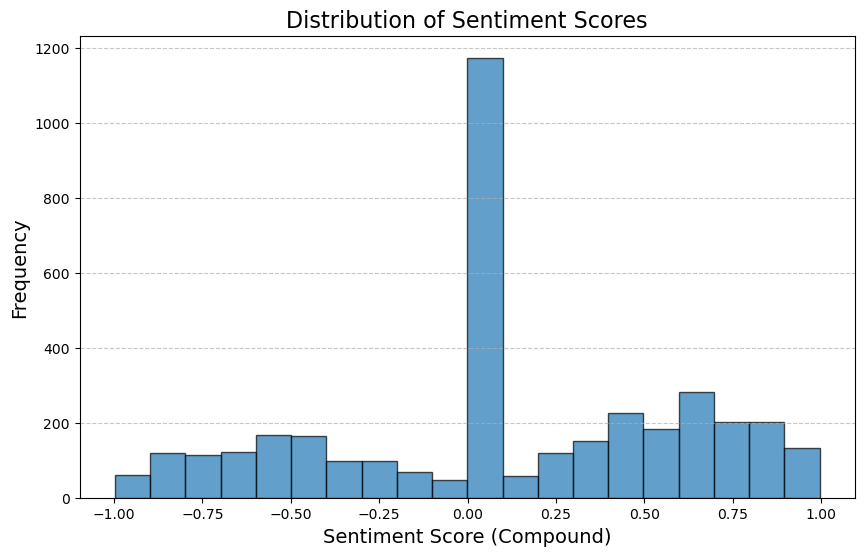

In [329]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(left_2025_cleaned['sentiment'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score (Compound)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

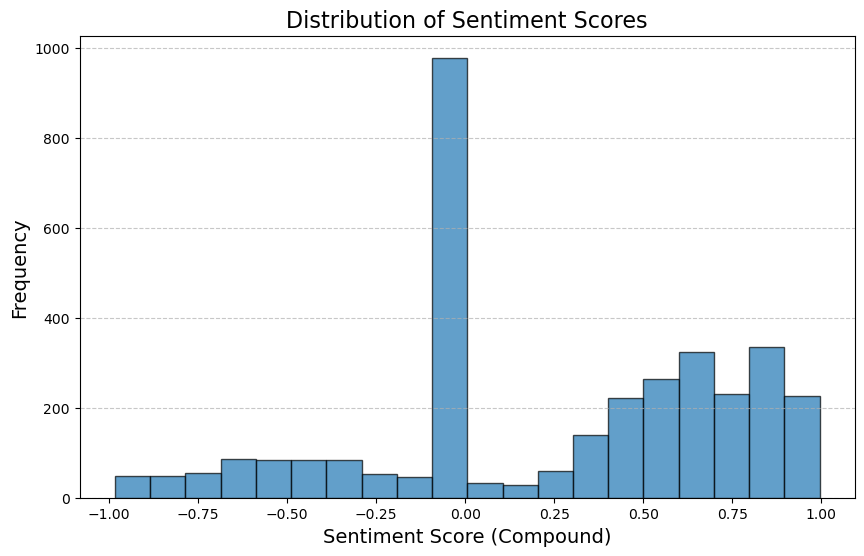

In [330]:
plt.figure(figsize=(10, 6))
plt.hist(right_2025_cleaned['sentiment'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score (Compound)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

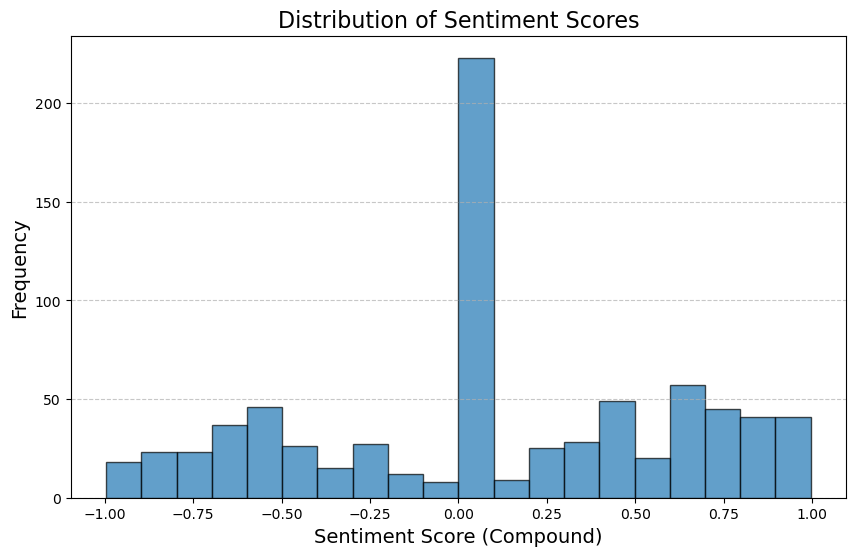

In [331]:
plt.figure(figsize=(10, 6))
plt.hist(left_2016_cleaned['sentiment'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score (Compound)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

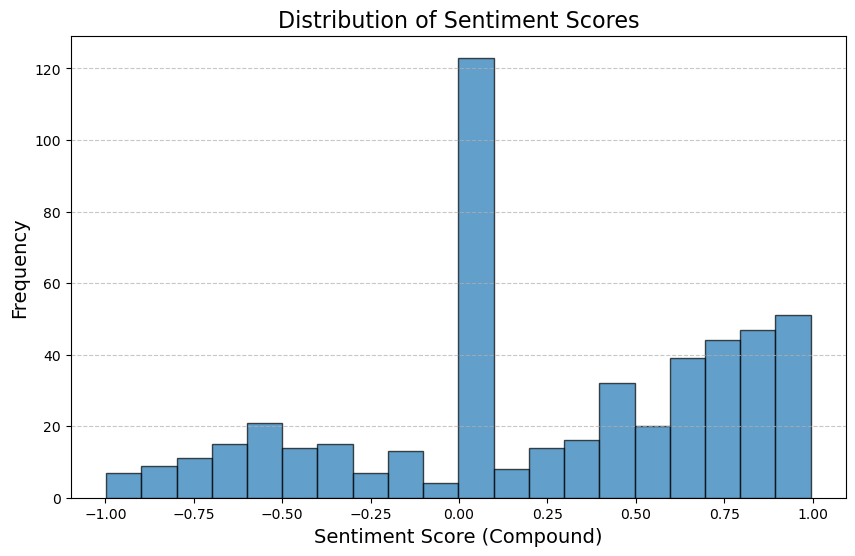

In [338]:
plt.figure(figsize=(10, 6))
plt.hist(right_2016_cleaned['sentiment'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score (Compound)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Since the distributions are clearly NOT normal, we will perfrom the Kruskal-Wallis H Test

In [339]:
# Perform the Kruskal-Wallis H Test
kruskal_result = kruskal(
    left_2025_cleaned['sentiment'],
    right_2025_cleaned['sentiment'],
    left_2016_cleaned['sentiment'],
    right_2016_cleaned['sentiment']
)


print("Kruskal-Wallis Test Result:")
print(f"H-statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")


if kruskal_result.pvalue < 0.05:
    print("There are significant differences in sentiment scores among the datasets.")
else:
    print("No significant differences in sentiment scores among the datasets.")

Kruskal-Wallis Test Result:
H-statistic: 221.61148725330747, p-value: 9.002430793902517e-48
There are significant differences in sentiment scores among the datasets.


In [340]:
# Combine sentiment scores and dataset labels into a single DataFrame
combined_data = pd.concat([
    left_2025_cleaned[['sentiment']].assign(dataset='left_2025'),
    right_2025_cleaned[['sentiment']].assign(dataset='right_2025'),
    left_2016_cleaned[['sentiment']].assign(dataset='left_2016'),
    right_2016_cleaned[['sentiment']].assign(dataset='right_2016')
])

# Perform Dunn's test with Bonferroni correction
dunn_result = posthoc_dunn(
    combined_data, 
    val_col='sentiment', 
    group_col='dataset', 
    p_adjust='bonferroni'
)

# Display the results
print("Dunn's Test Result (p-values):")
print(dunn_result)

Dunn's Test Result (p-values):
               left_2016     left_2025    right_2016    right_2025
left_2016   1.000000e+00  1.000000e+00  2.322360e-07  1.058809e-16
left_2025   1.000000e+00  1.000000e+00  1.374442e-09  2.702172e-42
right_2016  2.322360e-07  1.374442e-09  1.000000e+00  1.000000e+00
right_2025  1.058809e-16  2.702172e-42  1.000000e+00  1.000000e+00


## Left datasets are significantly different from the right datasets, highlighting that the political orientation of the youtube channel influence the sentiment in the comment section.